In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
import operator

import plotly.offline as py

py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from subprocess import check_output

print(check_output(["ls", "../data/kaggle"]).decode("utf8"))

RespondentTypeREADME.txt
conversionRates.csv
freeformResponses.csv
multipleChoiceResponses.csv
schema.csv



In [2]:
cvRates = pd.read_csv('../data/kaggle/conversionRates.csv', encoding="ISO-8859-1")
freeForm = pd.read_csv('../data/kaggle/freeformResponses.csv', encoding="ISO-8859-1")
data = pd.read_csv('../data/kaggle/multipleChoiceResponses.csv', encoding="ISO-8859-1")
schema = pd.read_csv('../data/kaggle/schema.csv', encoding="ISO-8859-1")

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/1673646314.py:2: DtypeWarning:

Columns (5,17,21,38,50) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/1673646314.py:3: DtypeWarning:

Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.



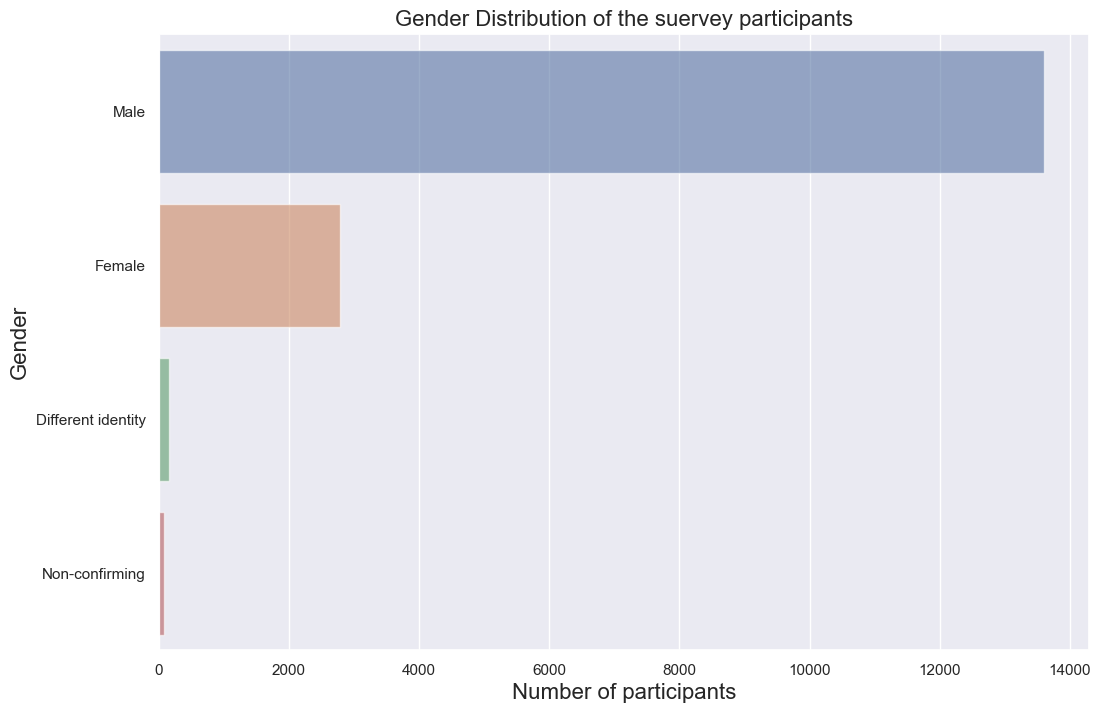

Proportion of women in this survey: 16.71% 
Proportion of men in this survey: 81.88% 


In [3]:
plt.figure(figsize=(12, 8))
genders = data['GenderSelect'].value_counts()
sns.barplot(y=genders.index, x=genders.values, alpha=0.6)
plt.yticks(range(len(data['GenderSelect'].value_counts().index)),
           ['Male', 'Female', 'Different identity', 'Non-confirming'])
plt.title("Gender Distribution of the suervey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.show()
print('Proportion of women in this survey: {:0.2f}% '.format(
    100 * len(data[data['GenderSelect'] == 'Female']) / len(data['GenderSelect'].dropna())))
print('Proportion of men in this survey: {:0.2f}% '.format(
    100 * len(data[data['GenderSelect'] == 'Male']) / len(data['GenderSelect'].dropna())))

In [4]:
print('{} instances seem to be too old (>65 years old)'.format(len(data[data['Age'] > 65])))
print('{} instances seem to be too young (<15 years old)'.format(len(data[data['Age'] < 15])))

154 instances seem to be too old (>65 years old)
35 instances seem to be too young (<15 years old)


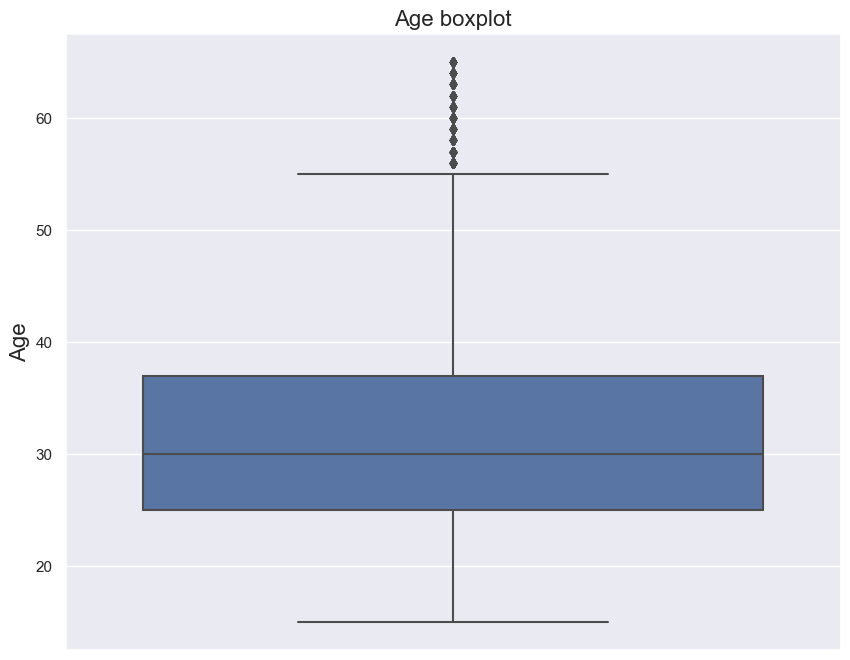

In [5]:
age = data[(data['Age'] >= 15) & (data['Age'] <= 65)]
plt.figure(figsize=(10, 8))
sns.boxplot(y=age['Age'], data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.show()

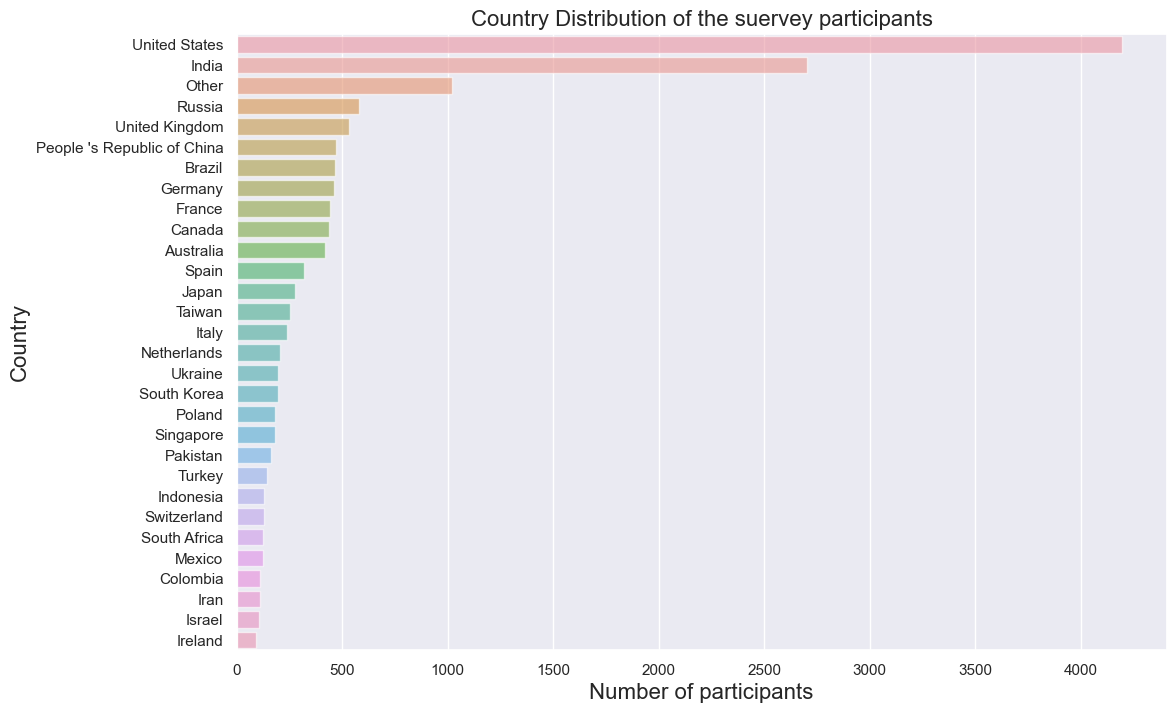

In [6]:
plt.figure(figsize=(12, 8))
countries = data['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title("Country Distribution of the suervey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show()

In [7]:
print('{:0.2f}% of the instances are Americans'.format(100 * len(data[data['Country'] == 'United States']) / len(data)))
print('{:0.2f}% of the instances are Indians'.format(100 * len(data[data['Country'] == 'India']) / len(data)))

25.11% of the instances are Americans
16.18% of the instances are Indians


In [8]:
edu = data['FormalEducation'].value_counts()
labels = (np.array(edu.index))
values = (np.array((edu / edu.sum()) * 100))
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textfont=dict(size=20),
               showlegend=False)
layout = go.Layout(title='Formal Education of the survey participants')
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Formal_Education")

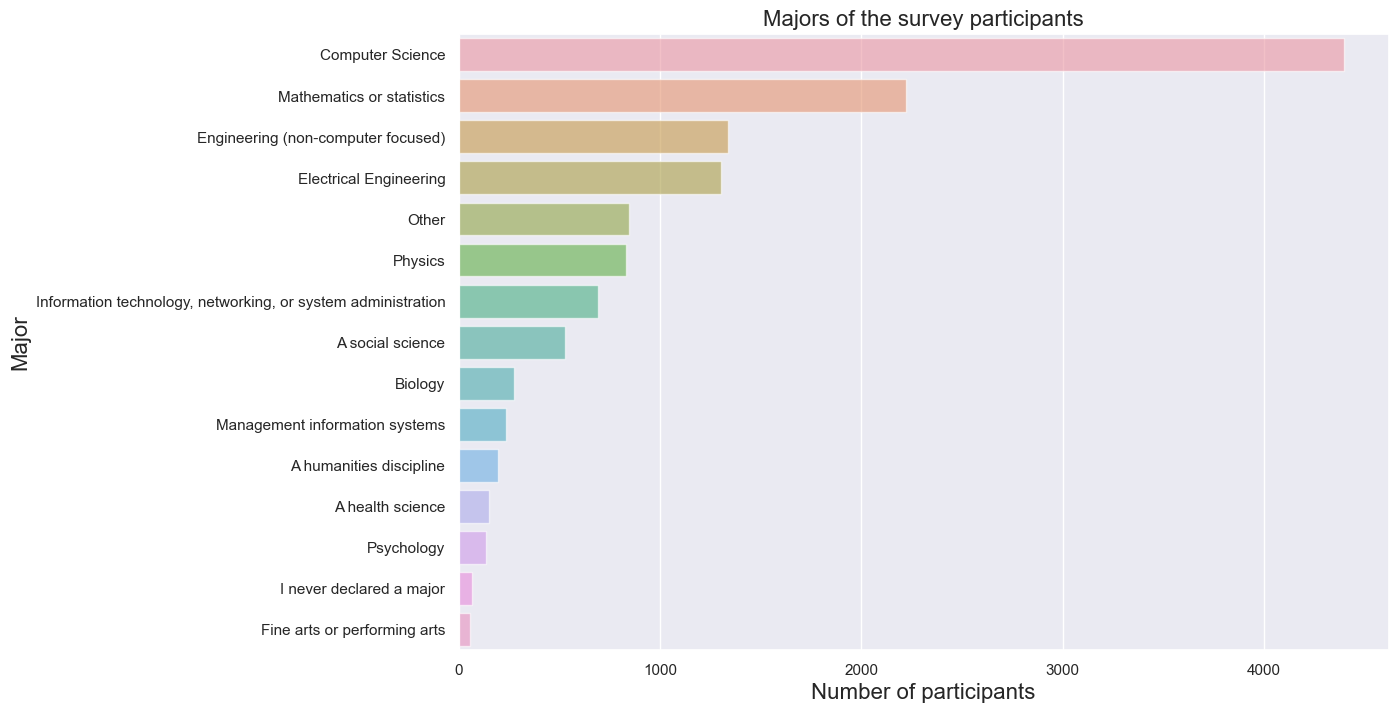

In [9]:
plt.figure(figsize=(12, 8))
majors = data['MajorSelect'].value_counts()
sns.barplot(y=majors.index, x=majors.values, alpha=0.6)
plt.title("Majors of the survey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Major", fontsize=16)
plt.show()

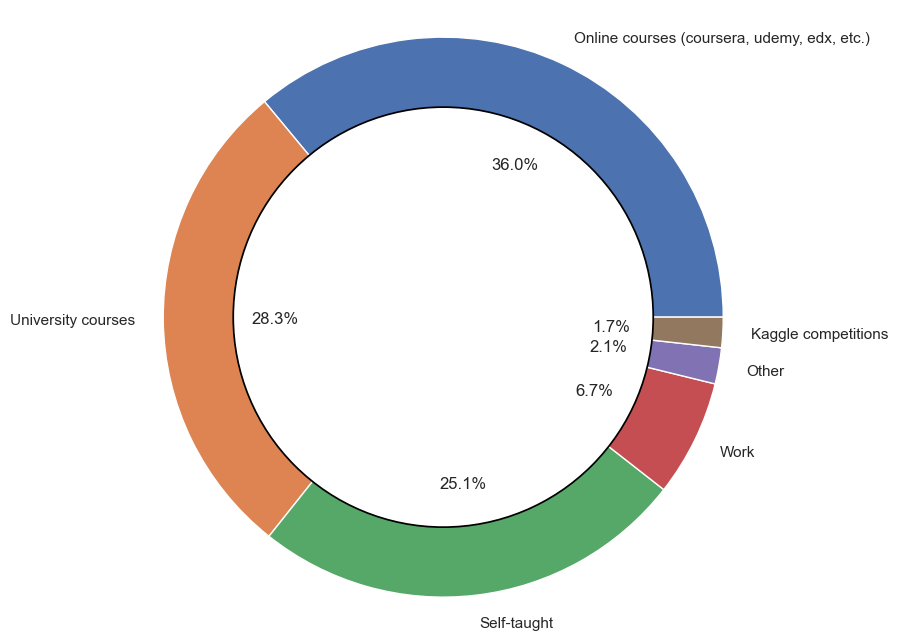

In [10]:
plt.figure(figsize=(10, 8))
temp = data['FirstTrainingSelect'].value_counts()
labels = temp.index
sizes = temp.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

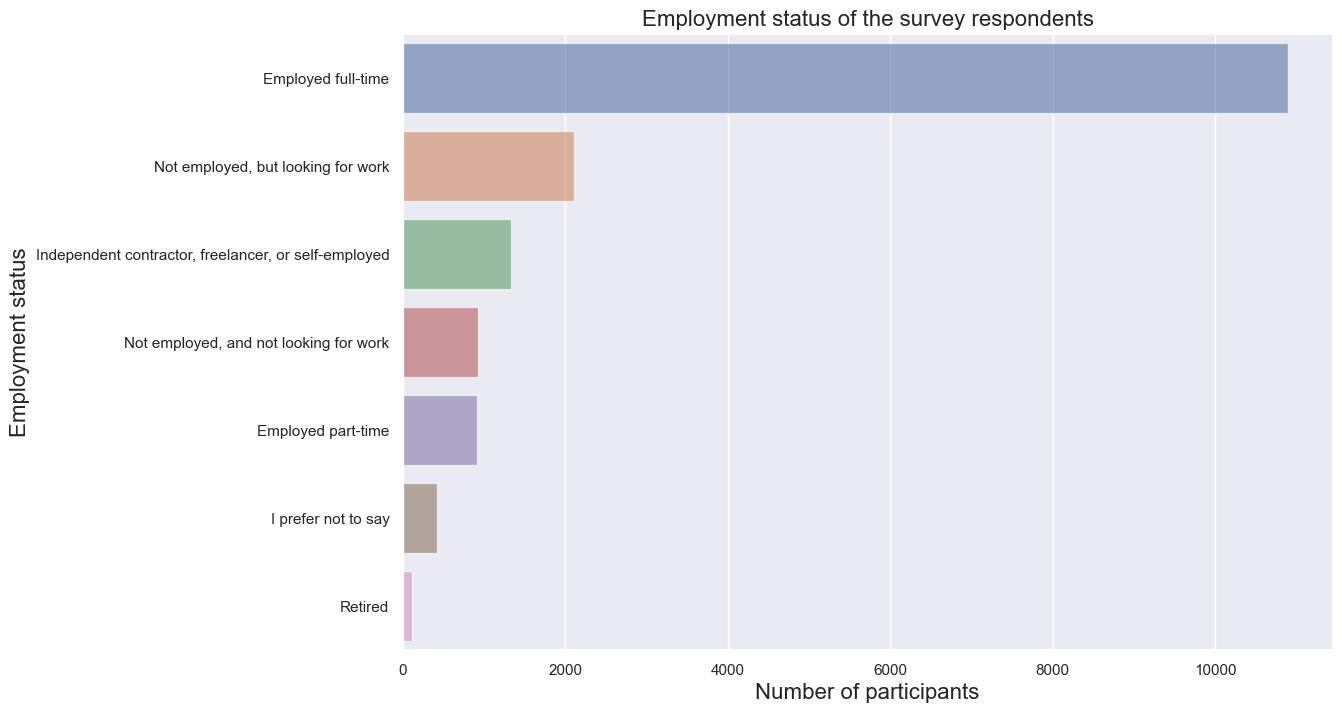

In [11]:
plt.figure(figsize=(12, 8))
status = data['EmploymentStatus'].value_counts()
sns.barplot(y=status.index, x=status.values, alpha=0.6)
plt.title("Employment status of the survey respondents", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Employment status", fontsize=16)
plt.show()

In [12]:
print('{:0.2f}% of the instances are employed full-time'.format(
    100 * len(data[data['EmploymentStatus'] == 'Employed full-time']) / len(data)))
status = ['Employed full-time', 'Independent', 'Employed part-time']
print('{:0.2f}% of the instances are employed'.format(100 * len(data[data.EmploymentStatus.isin(status)]) / len(data)))

65.19% of the instances are employed full-time
70.67% of the instances are employed


In [13]:
car = data['CareerSwitcher'].value_counts()
labels = (np.array(car.index))
proportions = (np.array((car / car.sum()) * 100))
colors = ['#FEBFB3', '#E1396C']
trace = go.Pie(labels=labels, values=proportions,
               hoverinfo='lbal+percent',
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))
layout = go.Layout(title='Working people looking to switch careers to data science')
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Career_Switcher")

ValueError: 
    Invalid value of type 'builtins.str' received for the 'hoverinfo' property of pie
        Received value: 'lbal+percent'

    The 'hoverinfo' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['label', 'text', 'value', 'percent', 'name'] joined with '+' characters
        (e.g. 'label+text')
        OR exactly one of ['all', 'none', 'skip'] (e.g. 'skip')
      - A list or array of the above

(-0.5, 599.5, 799.5, -0.5)

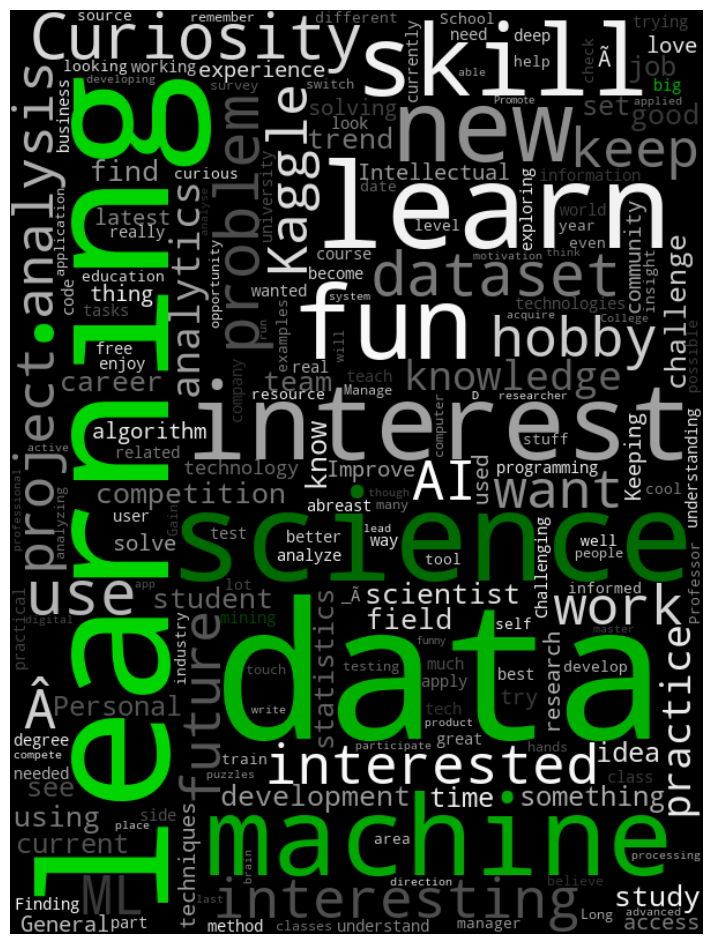

In [14]:
from wordcloud import (WordCloud, get_single_color_func)


class GroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]
        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func
        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


text = freeForm[pd.notnull(freeForm["KaggleMotivationFreeForm"])]["KaggleMotivationFreeForm"]
wc = WordCloud(collocations=False, height=800, width=600, relative_scaling=0.2, random_state=74364).generate(
    " ".join(text))
color_to_words = {'#00ff00': ['data', 'science', 'mining', 'big', 'bigdata', 'machine', 'learning']}
default_color = 'grey'
grouped_color_func = GroupedColorFunc(color_to_words, default_color)
wc.recolor(color_func=grouped_color_func)
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [15]:
t2 = data[["WorkToolsFrequencyR", "WorkToolsFrequencyPython"]].fillna(0)
t2.replace(to_replace=['Rarely', 'Sometimes', 'Often', 'Most of the time'],
           value=[1, 2, 3, 4], inplace=True)
t2['PythonVsR'] = ['R' if (freq1 > 2 and freq1 > freq2) else
                   'Python' if (freq1 < freq2 and freq2 > 2) else
                   'Both' if (freq1 == freq2 and freq1 > 2) else
                   'None' for (freq1, freq2) in zip(t2["WorkToolsFrequencyR"], t2["WorkToolsFrequencyPython"])]
data['PythonVsR'] = t2['PythonVsR']
df = data[data['PythonVsR'] != 'None']
print("Python users: ", len(df[df['PythonVsR'] == 'Python']))
print("R users: ", len(df[df['PythonVsR'] == 'R']))
print("Python+R users: ", len(df[df['PythonVsR'] == 'Both']))

Python users:  3438
R users:  1851
Python+R users:  878


/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/3533051926.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [16]:
test = df[['Country', 'PythonVsR']]
test['agg'] = np.ones(test.shape[0])

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/3642920077.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
%%HTML
<div class='tableauPlaceholder' id='viz1510841993802' style='position: relative'><noscript><a href='#'><img alt='Proportions of Python and R coders by country ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ka&#47;kaggle_kernel_final&#47;Feuille1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='kaggle_kernel_final&#47;Feuille1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ka&#47;kaggle_kernel_final&#47;Feuille1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1510841993802');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [18]:
df['Country'].fillna('Missing', inplace=True)

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/334188565.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/334188565.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
d_country = {}
for country in df['Country'].unique():
    maskp = (df['Country'] == country) & (df['PythonVsR'] == 'Python')
    maskr = (df['Country'] == country) & (df['PythonVsR'] == 'R')
    maskb = (df['Country'] == country) & (df['PythonVsR'] == 'Both')
    d_country[country] = {'Python': 100 * len(df[maskp]) / len(df[df['Country'] == country]),
                          'R': 100 * len(df[maskr]) / len(df[df['Country'] == country]),
                          'Both': 100 * len(df[maskb]) / len(df[df['Country'] == country])}
pd.DataFrame(d_country).transpose()
print('Table with percentage of use for each country')
print(pd.DataFrame(d_country).transpose().head(10).round(2))

Table with percentage of use for each country
                Python      R   Both
Brazil           55.93  24.29  19.77
Russia           83.02  14.15   2.83
India            45.79  33.71  20.51
Taiwan           68.75  16.25  15.00
United States    54.99  30.32  14.70
Czech Republic   62.86  25.71  11.43
Colombia         25.49  50.98  23.53
Germany          60.00  31.56   8.44
Denmark          43.59  35.90  20.51
Poland           50.00  41.18   8.82


In [20]:
df['WorkMethodsSelect'] = df['WorkMethodsSelect'].fillna('None')
techniques = ['Bayesian Techniques', 'Data Visualization', 'Logistic Regression', 'Natural Language Processing',
              'kNN and Other Clustering', 'Neural Networks', 'PCA and Dimensionality Reduction',
              'Time Series Analysis', 'Text Analytics', 'Cross-Validation']
df['WorkAlgorithmsSelect'] = df['WorkAlgorithmsSelect'].fillna('None')
algorithms = ['Bayesian Techniques', 'Decision Trees', 'Random Forests', 'Regression/Logistic Regression',
              'CNNs', 'RNNs', 'Gradient Boosted Machines', 'SVMs', 'GANs', 'Ensemble Methods']

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/935131246.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/935131246.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



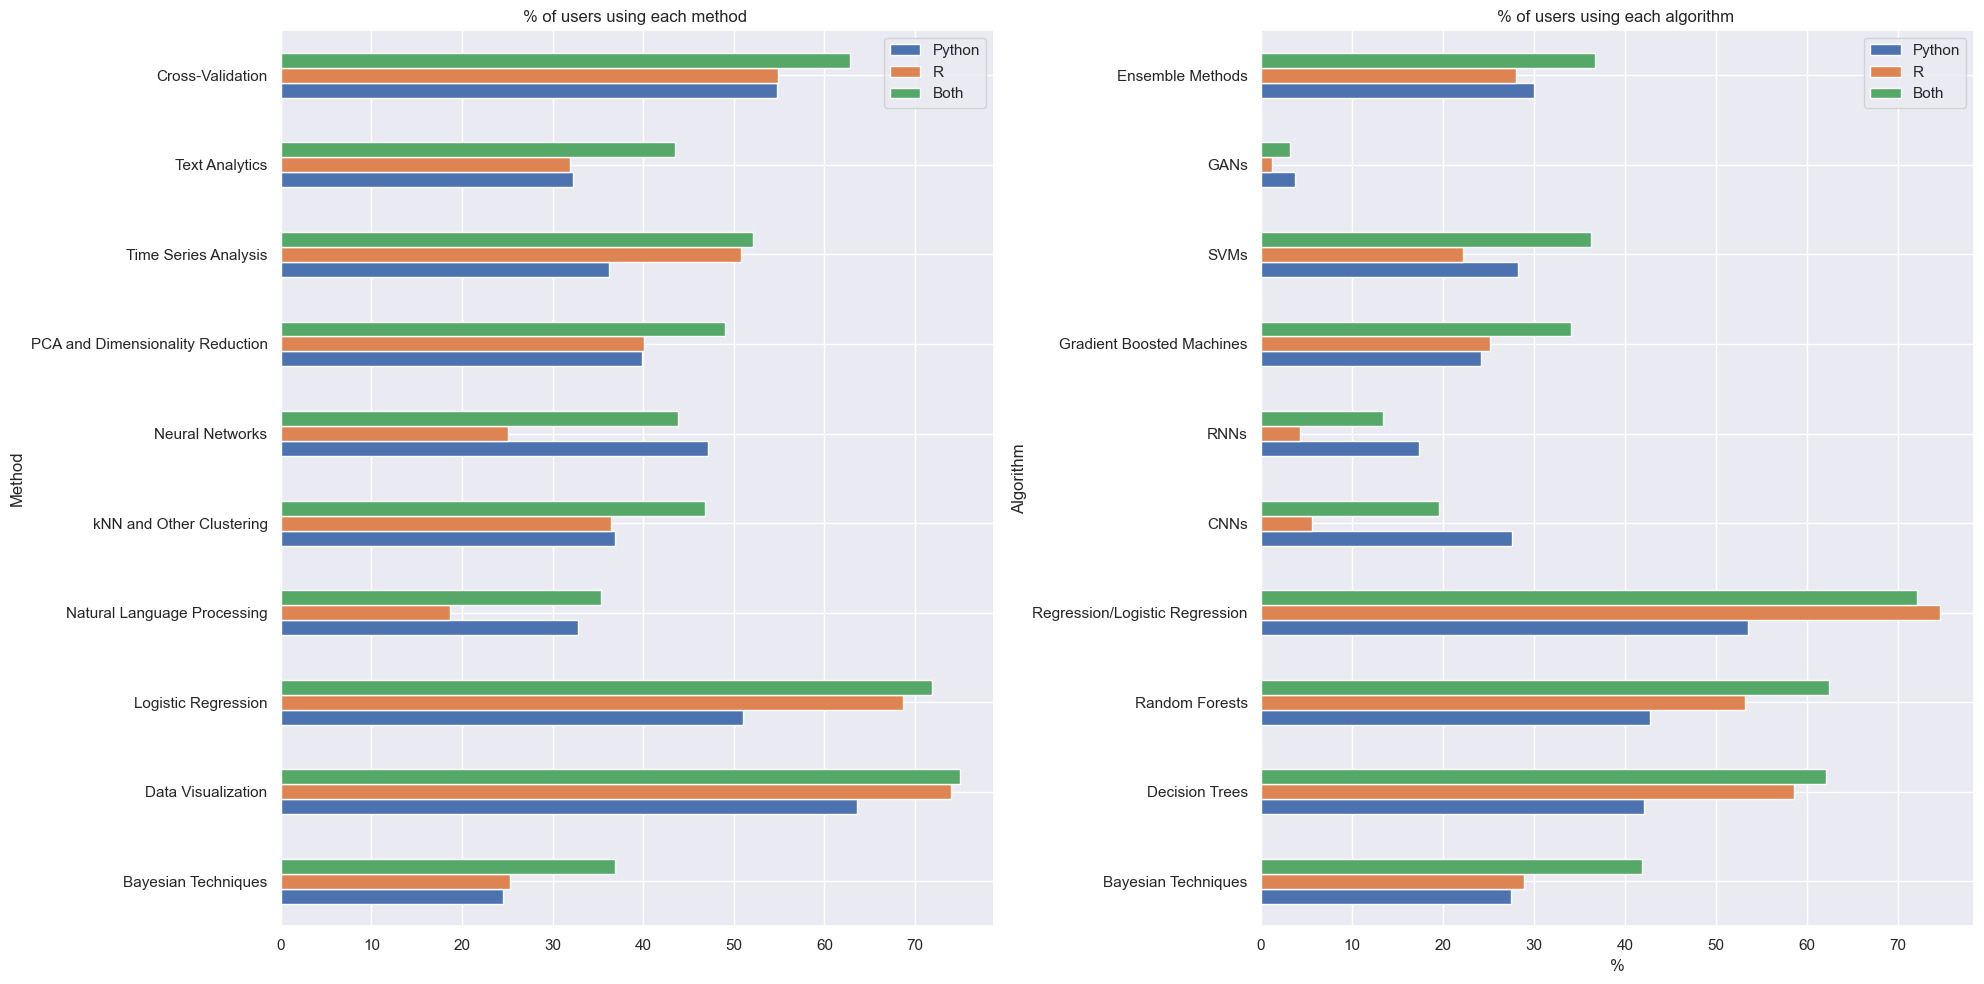

In [21]:
d = {}
for technique in techniques:
    d[technique] = {'Python': 0, 'R': 0, 'Both': 0}
    for (i, elem) in zip(range(df.shape[0]), df['WorkMethodsSelect']):
        if technique in elem:
            d[technique][df['PythonVsR'].iloc[i]] += 1
    d[technique]['Python'] = 100 * d[technique]['Python'] / len(df[df['PythonVsR'] == 'Python'])
    d[technique]['R'] = 100 * d[technique]['R'] / len(df[df['PythonVsR'] == 'R'])
    d[technique]['Both'] = 100 * d[technique]['Both'] / len(df[df['PythonVsR'] == 'Both'])
d_algo = {}
for algo in algorithms:
    d_algo[algo] = {'Python': 0, 'R': 0, 'Both': 0}
    for (i, elem) in zip(range(df.shape[0]), df['WorkAlgorithmsSelect']):
        if algo in elem:
            d_algo[algo][df['PythonVsR'].iloc[i]] += 1
    d_algo[algo]['Python'] = 100 * d_algo[algo]['Python'] / len(df[df['PythonVsR'] == 'Python'])
    d_algo[algo]['R'] = 100 * d_algo[algo]['R'] / len(df[df['PythonVsR'] == 'R'])
    d_algo[algo]['Both'] = 100 * d_algo[algo]['Both'] / len(df[df['PythonVsR'] == 'Both'])
f, ax = plt.subplots(1, 2, figsize=(20, 10))
(pd.DataFrame(d)).transpose().plot(kind='barh', ax=ax[0])
ax[0].set_title("% of users using each method ")
ax[0].set_xlabel('')
ax[0].set_ylabel("Method")
(pd.DataFrame(d_algo)).transpose().plot(kind='barh', ax=ax[1])
ax[1].set_title("% of users using each algorithm ")
ax[1].set_xlabel('%')
ax[1].set_ylabel("Algorithm")
plt.tight_layout()
plt.show()

In [22]:
df['MLSkillsSelect'].fillna('None', inplace=True)
skills = ['Natural Language Processing', 'Computer Vision', 'Adversarial Learning',
          'Supervised Machine Learning (Tabular Data)', 'Reinforcement learning',
          'Unsupervised Learning', 'Outlier detection (e.g. Fraud detection)',
          'Time Series', 'Recommendation Engines']

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/3386095369.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/3386095369.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



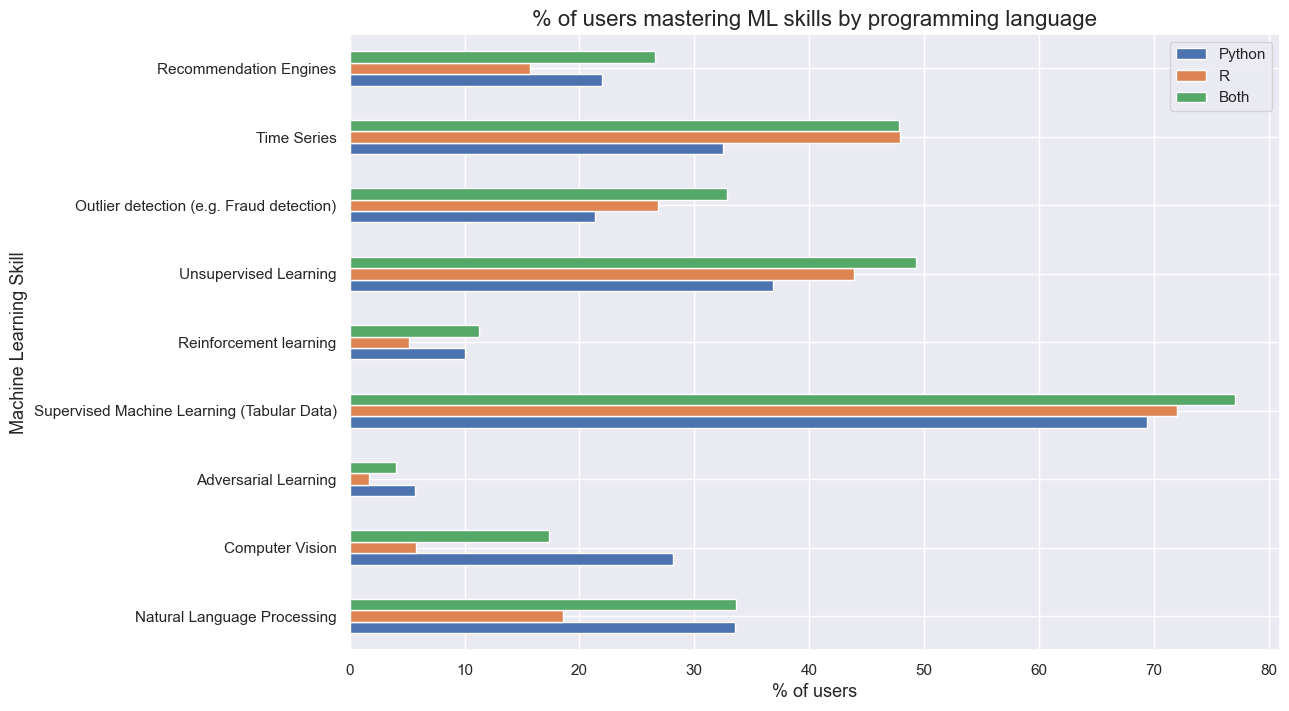

In [23]:
d_skills = {}
for skill in skills:
    d_skills[skill] = {'Python': 0, 'R': 0, 'Both': 0}
    for (i, elem) in zip(range(df.shape[0]), df['MLSkillsSelect']):
        if skill in elem:
            d_skills[skill][df['PythonVsR'].iloc[i]] += 1
    d_skills[skill]['Python'] = 100 * d_skills[skill]['Python'] / len(df[df['PythonVsR'] == 'Python'])
    d_skills[skill]['R'] = 100 * d_skills[skill]['R'] / len(df[df['PythonVsR'] == 'R'])
    d_skills[skill]['Both'] = 100 * d_skills[skill]['Both'] / len(df[df['PythonVsR'] == 'Both'])
(pd.DataFrame(d_skills)).transpose().plot(kind='barh', figsize=(12, 8))
plt.ylabel("Machine Learning Skill", fontsize=13)
plt.xlabel("% of users", fontsize=13)
plt.title("% of users mastering ML skills by programming language", fontsize=16)
plt.show()

In [24]:
df['WorkDataTypeSelect'].fillna('None', inplace=True)

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/1440902905.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/1440902905.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



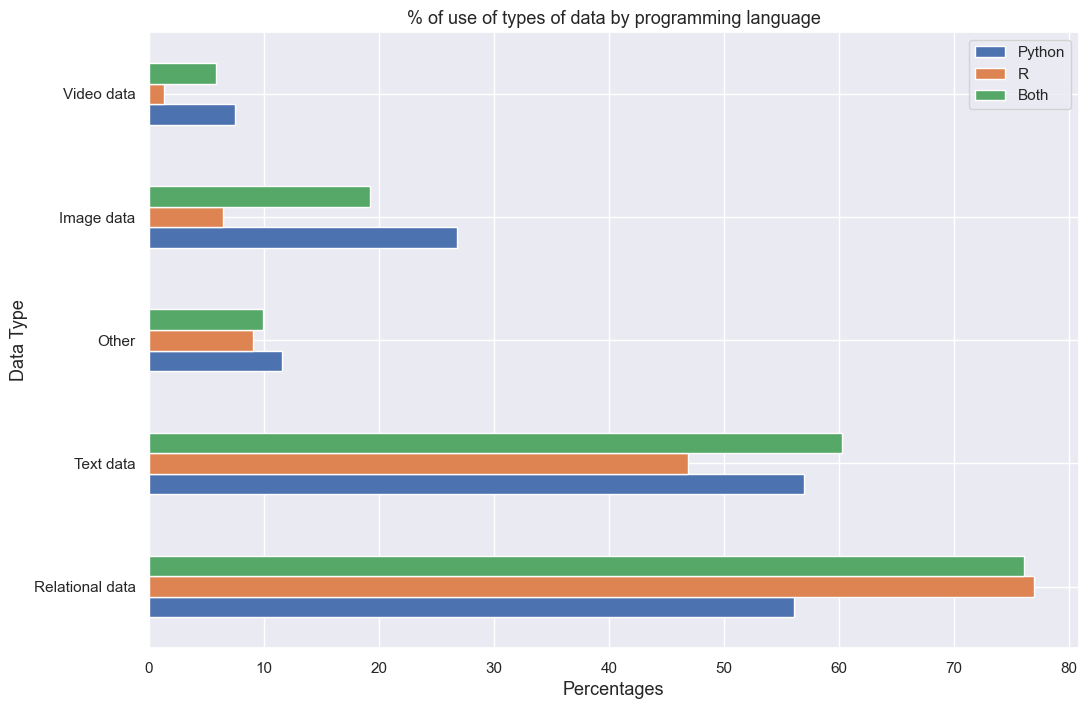

In [25]:
data_type = ['Relational data', 'Text data', 'Other',
             'Image data', 'Image data', 'Video data']
d_data = {}
for dtype in data_type:
    d_data[dtype] = {'Python': 0, 'R': 0, 'Both': 0}
    for (i, elem) in zip(range(df.shape[0]), df['WorkDataTypeSelect']):
        if dtype in elem:
            d_data[dtype][df['PythonVsR'].iloc[i]] += 1
    d_data[dtype]['Python'] = 100 * d_data[dtype]['Python'] / len(df[df['PythonVsR'] == 'Python'])
    d_data[dtype]['R'] = 100 * d_data[dtype]['R'] / len(df[df['PythonVsR'] == 'R'])
    d_data[dtype]['Both'] = 100 * d_data[dtype]['Both'] / len(df[df['PythonVsR'] == 'Both'])
(pd.DataFrame(d_data)).transpose().plot(kind='barh', figsize=(12, 8))
plt.ylabel("Data Type", fontsize=13)
plt.xlabel("Percentages", fontsize=13)
plt.title("% of use of types of data by programming language", fontsize=13)
plt.show()

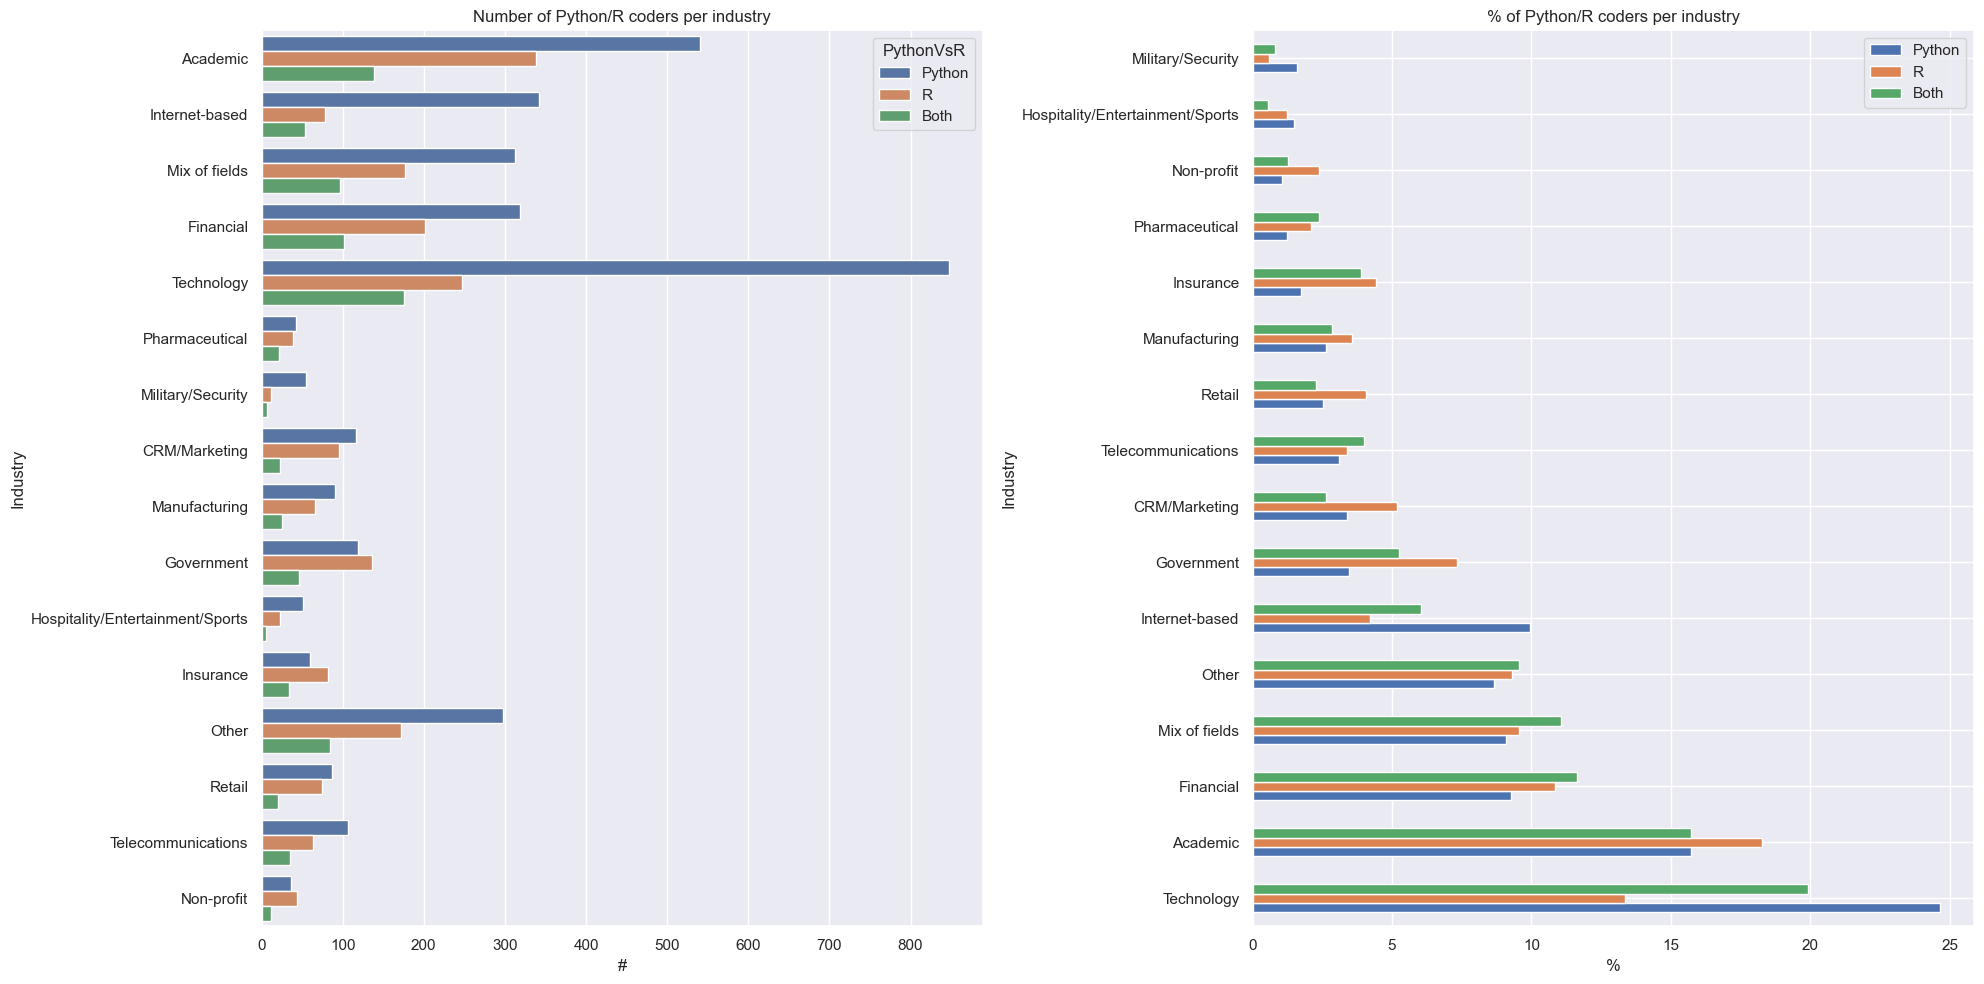

In [26]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(y='EmployerIndustry', hue='PythonVsR', data=df, ax=ax[0])
ax[0].set_title("Number of Python/R coders per industry")
ax[0].set_xlabel('#')
ax[0].set_ylabel("Industry")
d_ind = {}
for value in df['PythonVsR'].value_counts().index:
    temp = df[df['PythonVsR'] == value]
    d_ind[value] = {}
    for industry in df['EmployerIndustry'].value_counts().index:
        d_ind[value][industry] = 100 * len(temp[temp['EmployerIndustry'] == industry]) / len(temp)
(pd.DataFrame(d_ind)).plot(kind='barh', ax=ax[1])
ax[1].set_title('% of Python/R coders per industry')
ax[1].set_xlabel('%')
ax[1].set_ylabel("Industry")
plt.tight_layout()
plt.show()

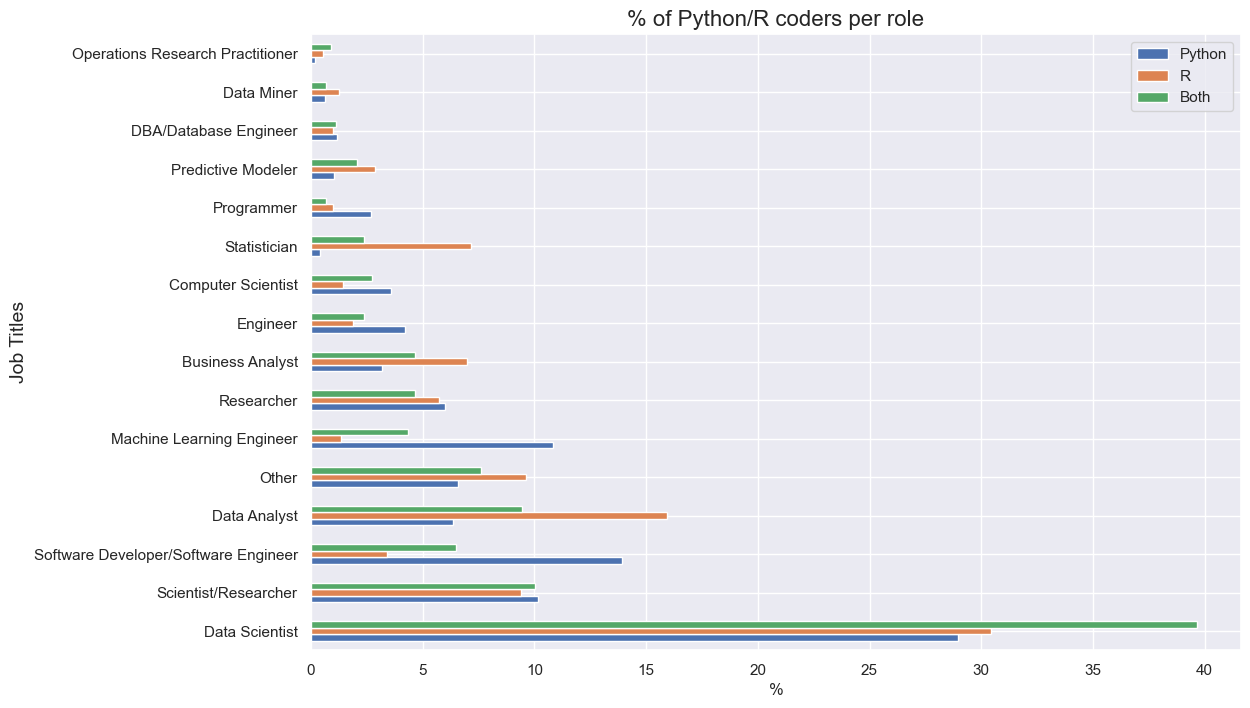

In [27]:
d_title = {}
for value in df['PythonVsR'].value_counts().index:
    temp = df[df['PythonVsR'] == value]
    d_title[value] = {}
    for title in df['CurrentJobTitleSelect'].value_counts().index:
        d_title[value][title] = 100 * len(temp[temp['CurrentJobTitleSelect'] == title]) / len(temp)
ax = (pd.DataFrame(d_title)).plot(kind='barh', figsize=(12, 8))
ax.set_title('% of Python/R coders per role', fontsize=16)
ax.set_xlabel('%')
ax.set_ylabel("Job Titles", fontsize=14)
plt.show()

In [28]:
from scipy.stats import chi2_contingency

conti = pd.crosstab(data['MajorSelect'], data['CurrentJobTitleSelect'])
conti

CurrentJobTitleSelect,Business Analyst,Computer Scientist,DBA/Database Engineer,Data Analyst,Data Miner,Data Scientist,Engineer,Machine Learning Engineer,Operations Research Practitioner,Other,Predictive Modeler,Programmer,Researcher,Scientist/Researcher,Software Developer/Software Engineer,Statistician
MajorSelect,,,,,,,,,,,,,,,,
A health science,10,4,2,13,1,18,1,4,1,17,1,5,9,26,6,2
A humanities discipline,11,3,3,33,4,29,3,6,0,28,2,5,13,16,15,5
A social science,38,1,2,89,5,137,4,5,5,50,11,6,51,37,17,11
Biology,8,1,1,19,2,69,5,5,0,18,1,3,9,73,14,9
Computer Science,105,206,70,238,27,530,101,262,4,254,23,187,176,186,859,11
Electrical Engineering,49,22,14,69,9,176,131,82,4,81,13,24,83,82,191,5
Engineering (non-computer focused),105,11,19,73,7,236,140,45,9,118,21,24,45,89,105,13
Fine arts or performing arts,5,1,0,4,0,5,1,1,0,13,0,3,7,1,8,0
I never declared a major,3,0,0,7,0,7,3,2,0,6,0,0,2,2,13,1


In [29]:
p_value = chi2_contingency(conti, lambda_='log-likelihood')[1]
p_value

0.0

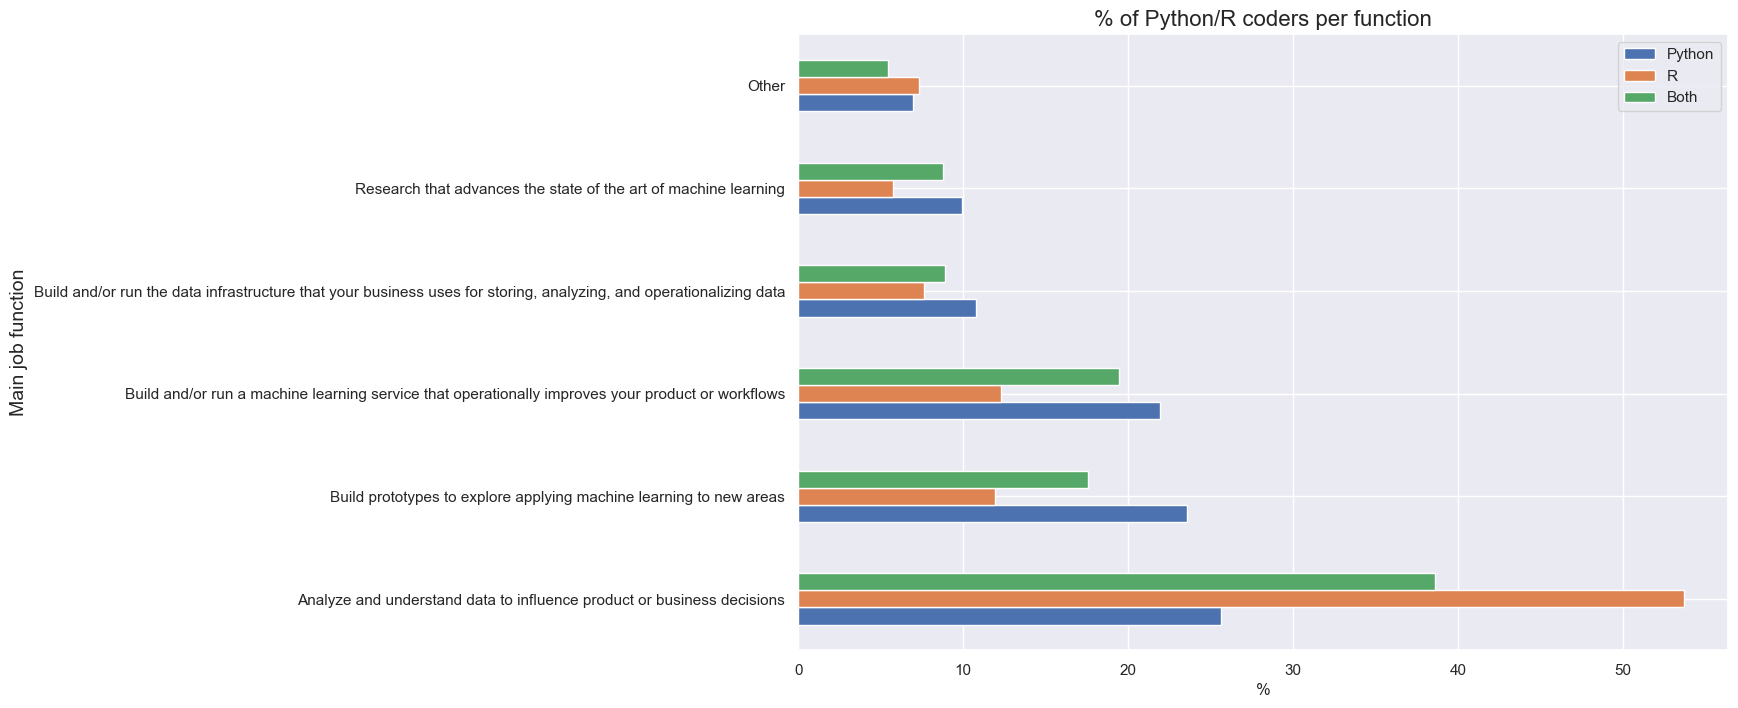

In [30]:
d_title = {}
for value in df['PythonVsR'].value_counts().index:
    temp = df[df['PythonVsR'] == value]
    d_title[value] = {}
    for title in df['JobFunctionSelect'].value_counts().index:
        d_title[value][title] = 100 * len(temp[temp['JobFunctionSelect'] == title]) / len(temp)
ax = (pd.DataFrame(d_title)).plot(kind='barh', figsize=(12, 8))
ax.set_title('% of Python/R coders per function', fontsize=16)
ax.set_xlabel('%')
ax.set_ylabel("Main job function", fontsize=14)
plt.show()

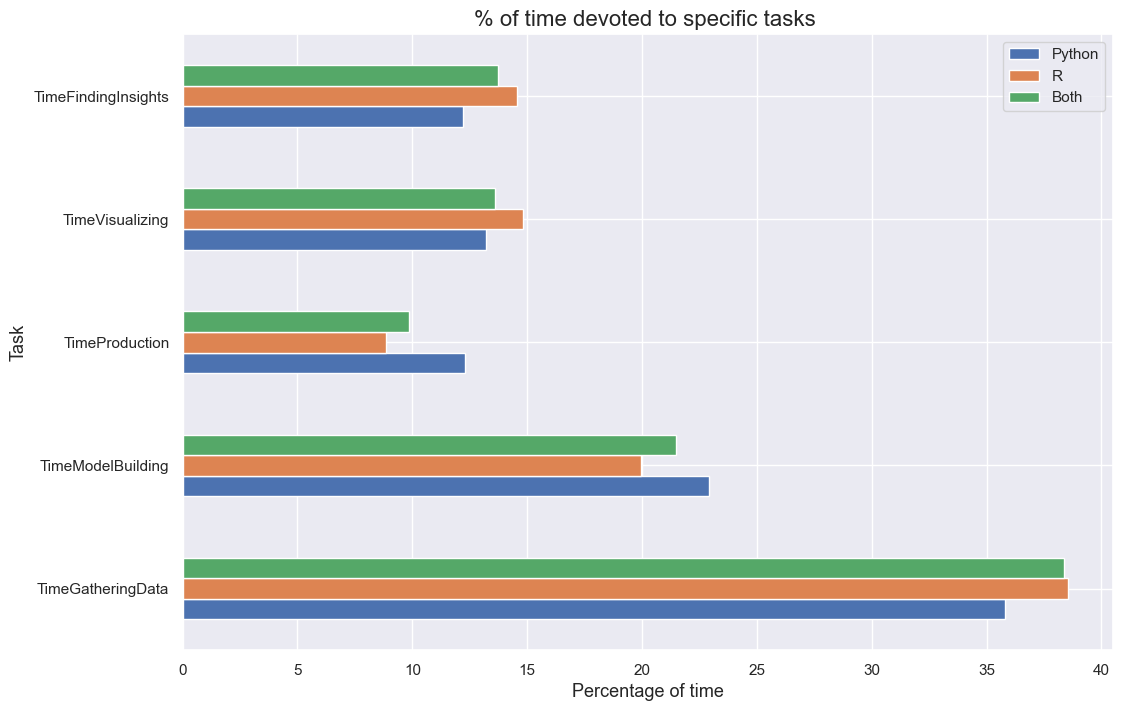

In [31]:
d_task = {}
tasks = ['TimeGatheringData', 'TimeModelBuilding', 'TimeProduction', 'TimeVisualizing', 'TimeFindingInsights']
for task in tasks:
    d_task[task] = {'Python': df[df['PythonVsR'] == 'Python'][task].mean(),
                    'R': df[df['PythonVsR'] == 'R'][task].mean(),
                    'Both': df[df['PythonVsR'] == 'Both'][task].mean()}
(pd.DataFrame(d_task)).transpose().plot(kind='barh', figsize=(12, 8))
plt.ylabel("Task", fontsize=13)
plt.xlabel("Percentage of time", fontsize=13)
plt.title("% of time devoted to specific tasks ", fontsize=16)
plt.show()

In [32]:
df['WorkProductionFrequency'] = df['WorkProductionFrequency'].fillna("Don't know")

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/391476388.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



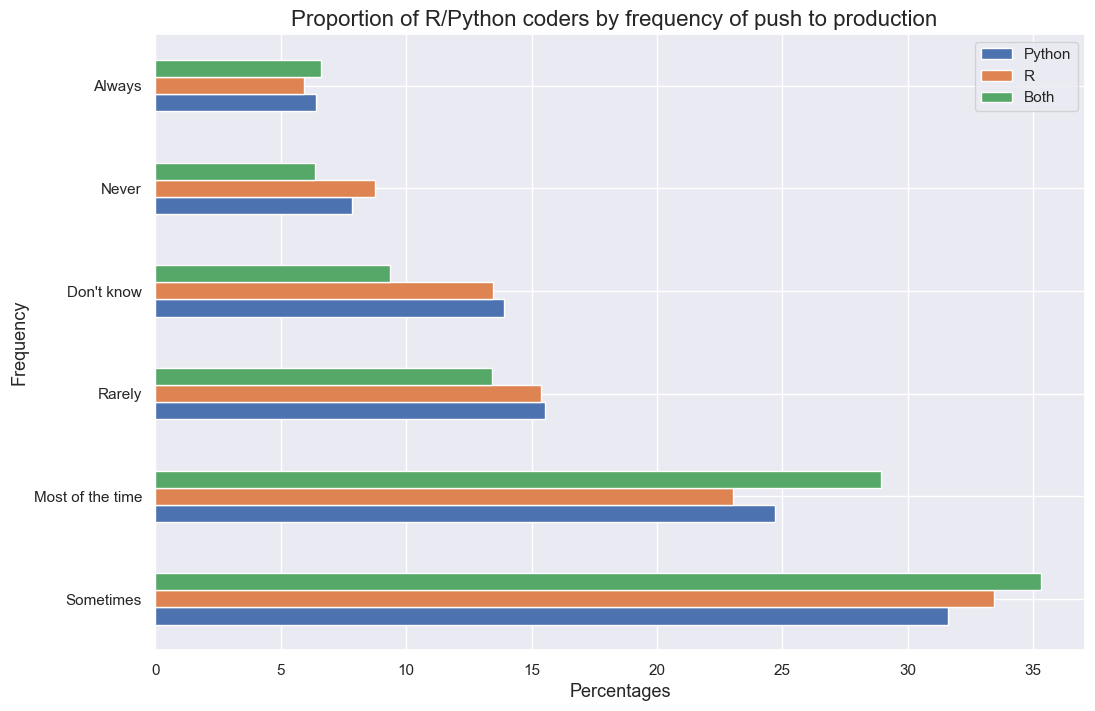

In [33]:
d_prod = {}
for value in df['PythonVsR'].value_counts().index:
    temp = df[df['PythonVsR'] == value]
    d_prod[value] = {}
    for frequency in df['WorkProductionFrequency'].value_counts().index:
        d_prod[value][frequency] = 100 * len(temp[temp['WorkProductionFrequency'] == frequency]) / len(temp)
(pd.DataFrame(d_prod)).plot(kind='barh', figsize=(12, 8))
plt.ylabel("Frequency", fontsize=13)
plt.xlabel("Percentages", fontsize=13)
plt.title("Proportion of R/Python coders by frequency of push to production  ", fontsize=16)
plt.show()

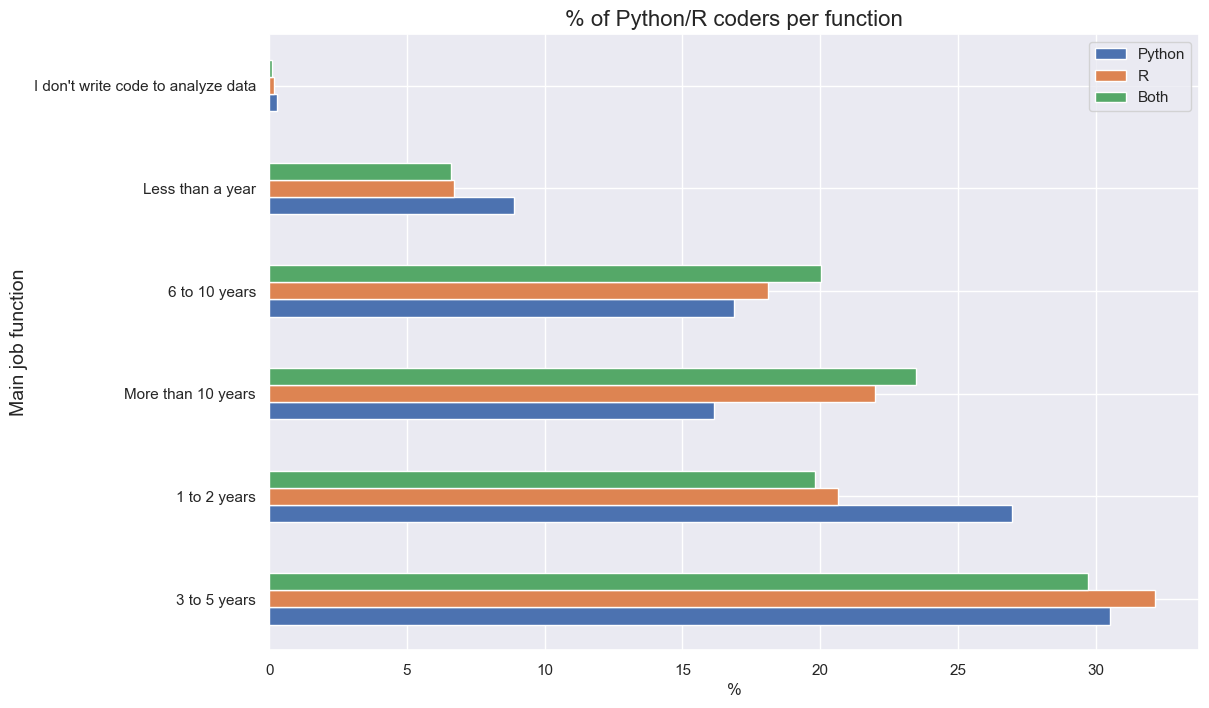

In [34]:
d_tenure = {}
for value in df['PythonVsR'].value_counts().index:
    temp = df[df['PythonVsR'] == value]
    d_tenure[value] = {}
    for dur in df['Tenure'].value_counts().index:
        d_tenure[value][dur] = 100 * len(temp[temp['Tenure'] == dur]) / len(temp)
ax = (pd.DataFrame(d_tenure)).plot(kind='barh', figsize=(12, 8))
ax.set_title('% of Python/R coders per function', fontsize=16)
ax.set_xlabel('%')
ax.set_ylabel("Main job function", fontsize=14)
plt.show()

In [35]:
df['LanguageRecommendationSelect'].fillna('Other', inplace=True)

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/137156342.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/137156342.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



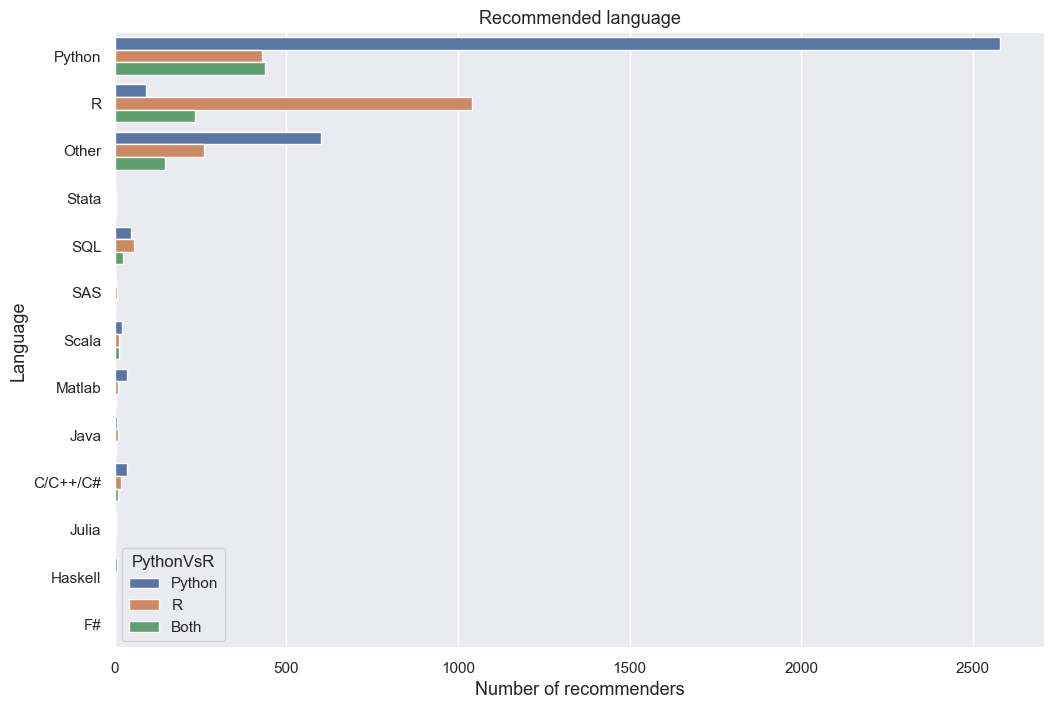

Proportion of Python users who recommend R as the first language to learn: 2.68%
Proportion of R users who recommend Python as the first language to learn: 23.12%


In [36]:
plt.figure(figsize=(12, 8))
sns.countplot(y='LanguageRecommendationSelect', hue='PythonVsR', data=df)
plt.ylabel("Language", fontsize=13)
plt.xlabel("Number of recommenders", fontsize=13)
plt.title("Recommended language", fontsize=13)
plt.show()
mask1 = (df['LanguageRecommendationSelect'] == 'R') & (df['PythonVsR'] == 'Python')
print('Proportion of Python users who recommend R as the first language to learn: {:0.2f}%'.format(
    100 * len(df[mask1]) / len(df[df['PythonVsR'] == 'Python'])))
mask1 = (df['LanguageRecommendationSelect'] == 'Python') & (df['PythonVsR'] == 'R')
print('Proportion of R users who recommend Python as the first language to learn: {:0.2f}%'.format(
    100 * len(df[mask1]) / len(df[df['PythonVsR'] == 'R'])))

In [37]:
demographic_features = ['GenderSelect', 'Country', 'Age',
                        'FormalEducation', 'MajorSelect', 'ParentsEducation',
                        'EmploymentStatus', 'CurrentJobTitleSelect',
                        'DataScienceIdentitySelect', 'CodeWriter',
                        'CurrentEmployerType', 'JobFunctionSelect',
                        'SalaryChange', 'RemoteWork', 'WorkMLTeamSeatSelect',
                        'Tenure', 'EmployerIndustry', 'EmployerSize', 'PythonVsR',
                        'CompensationAmount']
data_dem = data[demographic_features]
data_dem.head(5)

,GenderSelect,Country,Age,FormalEducation,MajorSelect,ParentsEducation,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,JobFunctionSelect,SalaryChange,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,PythonVsR,CompensationAmount
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Bachelor's degree,Management information systems,A doctoral degree,Employed full-time,DBA/Database Engineer,Yes,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,I am not currently employed,Always,Standalone Team,More than 10 years,Internet-based,100 to 499 employees,None,NaN
1,Female,United States,30.0,Master's degree,Computer Science,A bachelor's degree,"Not employed, but looking for work",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Less than a year,NaN,NaN,None,NaN
2,Male,Canada,28.0,Master's degree,Engineering (non-computer focused),A bachelor's degree,"Not employed, but looking for work",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,3 to 5 years,NaN,NaN,None,NaN
3,Male,United States,56.0,Master's degree,Mathematics or statistics,High school,"Independent contractor, freelancer, or self-em...",Operations Research Practitioner,Yes,Yes,Self-employed,Analyze and understand data to influence produ...,Has increased 20% or more,NaN,Standalone Team,More than 10 years,Mix of fields,NaN,None,"250,000"
4,Male,Taiwan,38.0,Doctoral degree,Engineering (non-computer focused),Primary/elementary school,Employed full-time,Computer Scientist,No,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,I do not want to share information about my sa...,Rarely,Business Department,More than 10 years,Technology,"5,000 to 9,999 employees",None,NaN


In [38]:
data_dem['CompensationAmount'] = data_dem['CompensationAmount'].fillna(0)
data_dem['CompensationAmount'] = data_dem.CompensationAmount.apply(
    lambda x: 0 if (pd.isnull(x) or (x == '-') or (x == 0))
    else float(x.replace(',', '')))

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/672224672.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/672224672.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/365405905.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



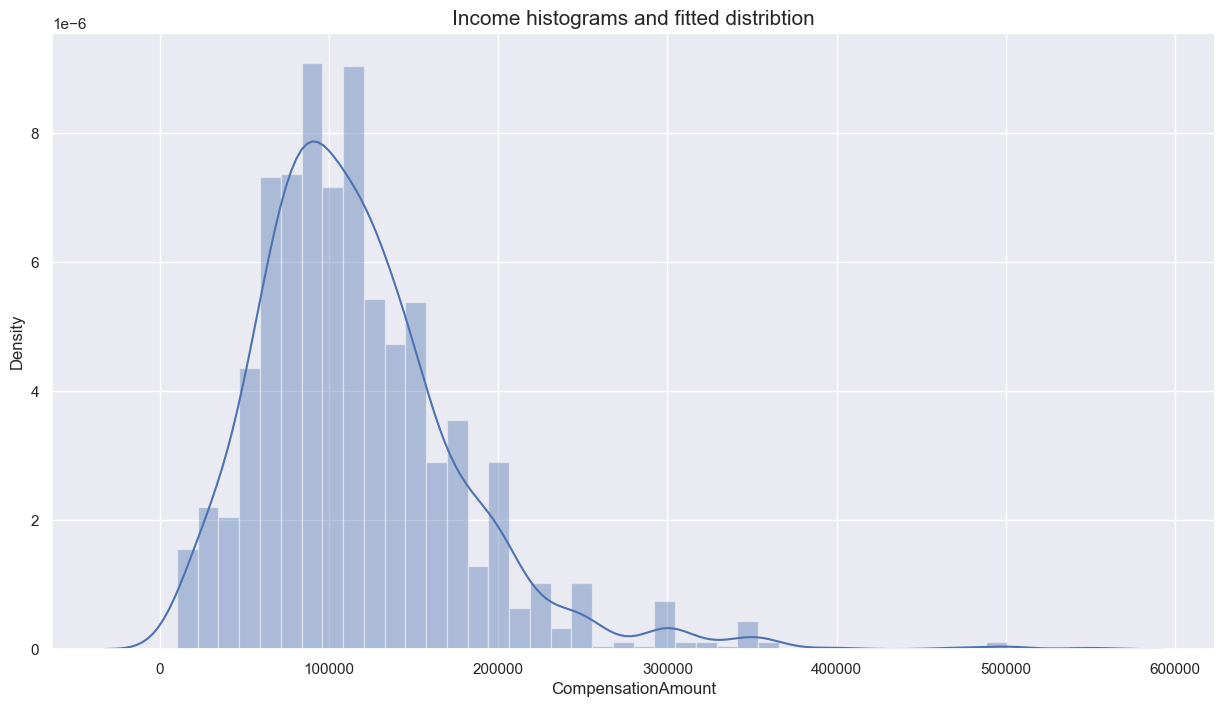

In [39]:
data_dem = data_dem[(data_dem['CompensationAmount'] > 5000) & (data_dem['CompensationAmount'] < 1000000)]
data_dem = data_dem[data_dem['Country'] == 'United States']
plt.subplots(figsize=(15, 8))
sns.distplot(data_dem['CompensationAmount'])
plt.title('Income histograms and fitted distribtion', size=15)
plt.show()

In [40]:
print('The median salary for US data scientist: {} USD'.format(data_dem['CompensationAmount'].median()))
print('The mean salary for US data scientist: {:0.2f} USD'.format(data_dem['CompensationAmount'].mean()))

The median salary for US data scientist: 107000.0 USD
The mean salary for US data scientist: 116649.99 USD


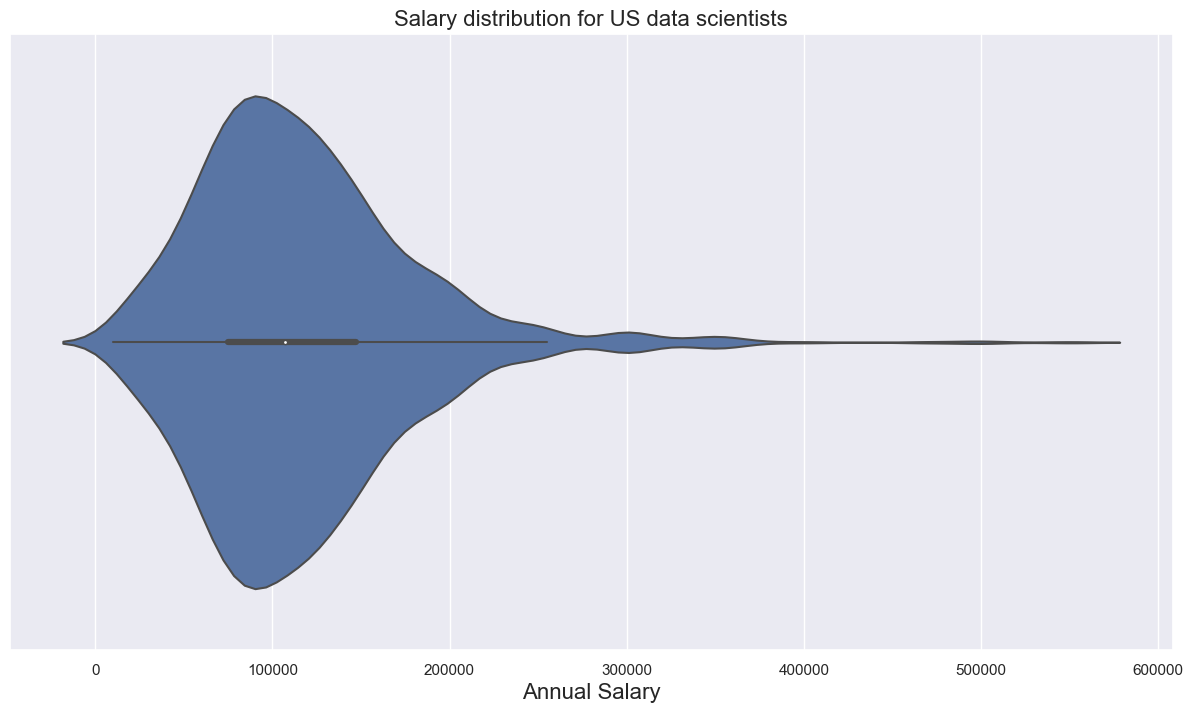

In [41]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='CompensationAmount', data=data_dem)
plt.title("Salary distribution for US data scientists", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.show()

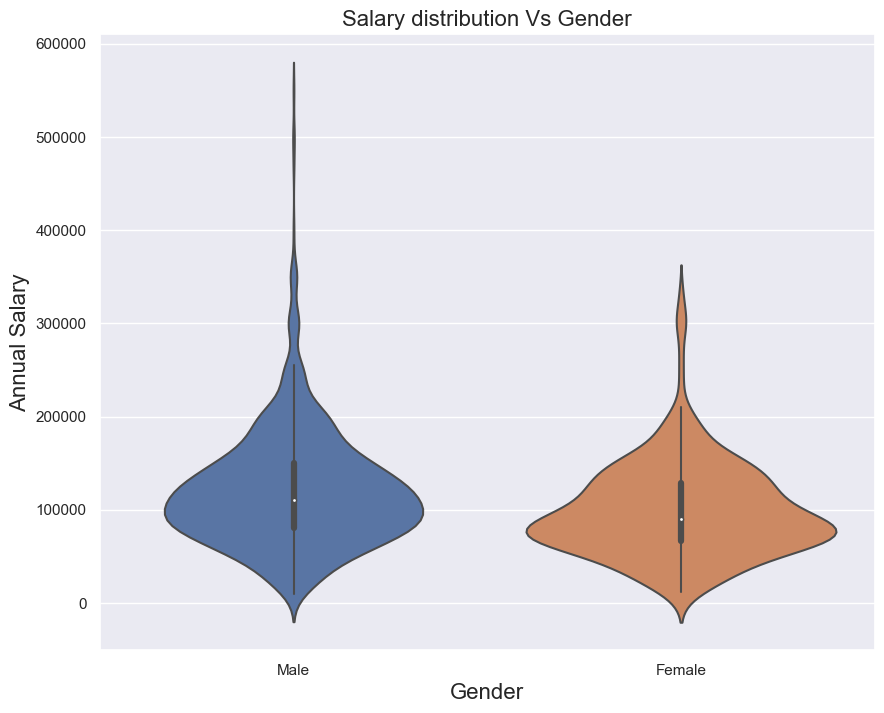

In [42]:
temp = data_dem[data_dem.GenderSelect.isin(['Male', 'Female'])]
plt.figure(figsize=(10, 8))
sns.violinplot(y='CompensationAmount', x='GenderSelect', data=temp)
plt.title("Salary distribution Vs Gender", fontsize=16)
plt.ylabel("Annual Salary", fontsize=16)
plt.xlabel("Gender", fontsize=16)
plt.show()

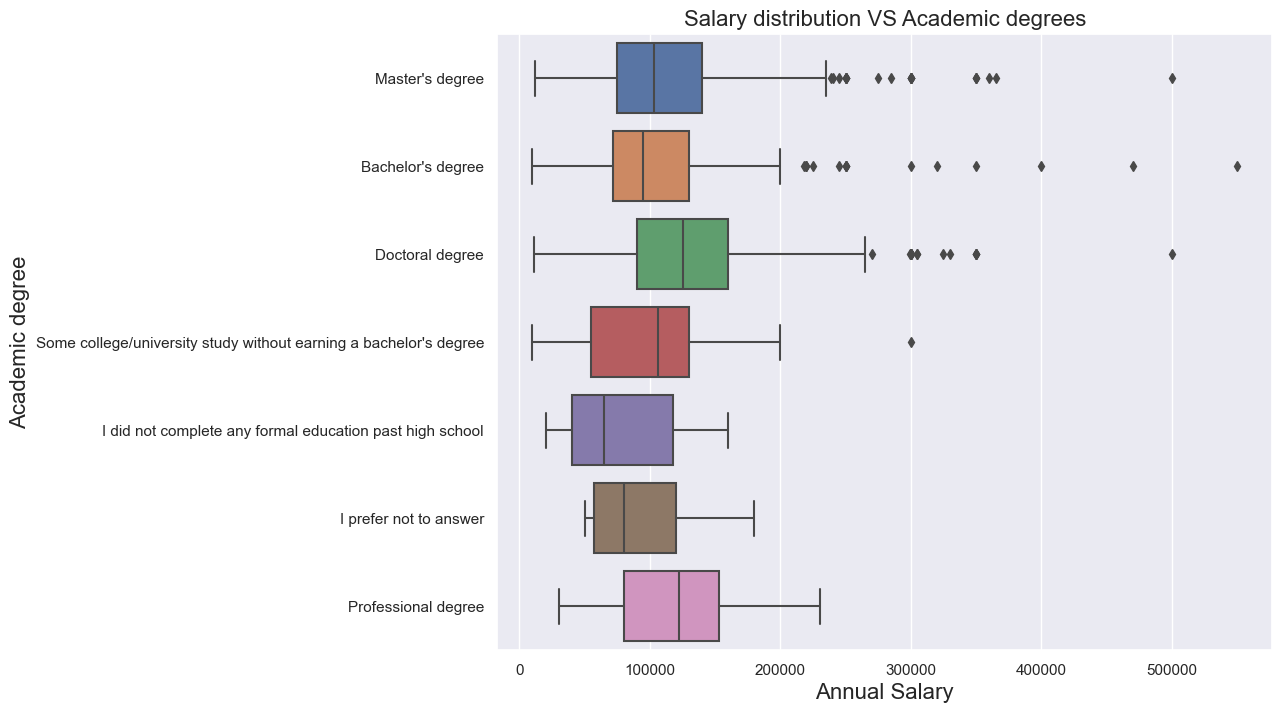

In [43]:
titles = list(data_dem['FormalEducation'].value_counts().index)
temp = data_dem[data_dem.FormalEducation.isin(titles)]
plt.figure(figsize=(10, 8))
sns.boxplot(x='CompensationAmount', y='FormalEducation', data=temp)
plt.title("Salary distribution VS Academic degrees", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.ylabel("Academic degree", fontsize=16)
plt.show()

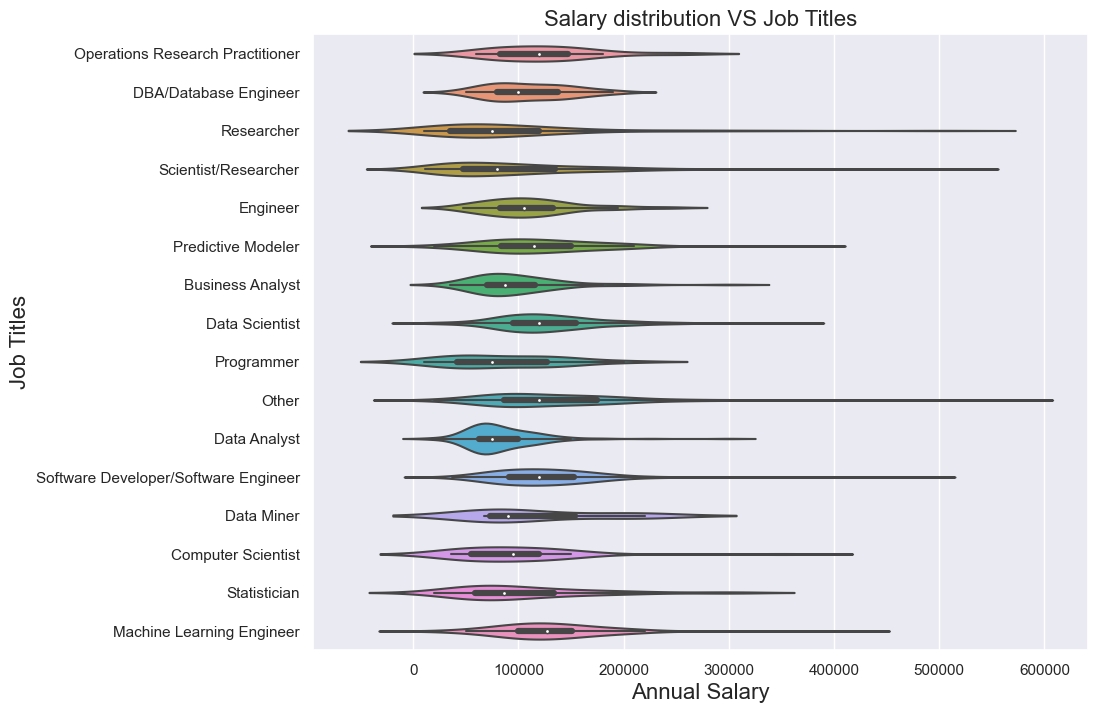

In [44]:
titles = list(data_dem['CurrentJobTitleSelect'].value_counts().index)
temp = data_dem[data_dem.CurrentJobTitleSelect.isin(titles)]
plt.figure(figsize=(10, 8))
sns.violinplot(x='CompensationAmount', y='CurrentJobTitleSelect', data=temp)
plt.title("Salary distribution VS Job Titles", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.ylabel("Job Titles", fontsize=16)
plt.show()

In [45]:
data_dem['CompensationAmount'] = pd.cut(data_dem['CompensationAmount'], bins=[0, 130000, 1000000],
                                        include_lowest=True, labels=[1, 2])
data_dem['Age'] = pd.cut(data_dem['Age'], bins=[0, 18, 25, 30, 35, 40, 50, 60, 100],
                         include_lowest=True, labels=[1, 2, 3, 4, 5, 6, 7, 8])
data_dem.drop('Country', axis=1, inplace=True)

In [46]:
ex_p = data_dem.loc[[133, 247, 499, 576, 2375, 3578, 3606, 3876, 5758, 6059, 10155, 10514, 11552, 13438, 15631]]
ex_p.head(10)

,GenderSelect,Age,FormalEducation,MajorSelect,ParentsEducation,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,JobFunctionSelect,SalaryChange,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,PythonVsR,CompensationAmount
133,Male,2,Master's degree,Engineering (non-computer focused),NaN,Employed full-time,Business Analyst,Yes,Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,Has increased between 6% and 19%,NaN,Business Department,1 to 2 years,Retail,100 to 499 employees,R,1
247,Male,2,Bachelor's degree,Mathematics or statistics,A professional degree,Employed part-time,Business Analyst,Sort of (Explain more),Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,Has increased 20% or more,Rarely,IT Department,3 to 5 years,Manufacturing,"1,000 to 4,999 employees",R,1
499,Male,2,Bachelor's degree,Other,A master's degree,Employed full-time,Data Analyst,Yes,Yes,Employed by professional services/consulting firm,Analyze and understand data to influence produ...,I was not employed 3 years ago,Rarely,Business Department,1 to 2 years,Financial,"10,000 or more employees",R,1
576,Female,2,Bachelor's degree,Mathematics or statistics,A master's degree,Employed full-time,Data Analyst,Yes,Yes,Employed by a company that performs advanced a...,Analyze and understand data to influence produ...,I was not employed 3 years ago,Rarely,Standalone Team,1 to 2 years,Technology,100 to 499 employees,Python,1
2375,Female,2,Bachelor's degree,Other,A master's degree,Employed full-time,Business Analyst,Sort of (Explain more),Yes,Employed by professional services/consulting f...,Analyze and understand data to influence produ...,I was not employed 3 years ago,NaN,Standalone Team,1 to 2 years,Internet-based,"1,000 to 4,999 employees",Python,1
3578,Male,2,Bachelor's degree,Mathematics or statistics,A master's degree,Employed part-time,Data Scientist,NaN,Yes,Employed by a company that performs advanced a...,Analyze and understand data to influence produ...,Has increased 20% or more,Rarely,IT Department,1 to 2 years,Technology,"10,000 or more employees",R,1
3606,Female,4,Master's degree,A health science,A master's degree,Employed full-time,Data Analyst,No,Yes,Employed by non-profit or NGO,Build and/or run the data infrastructure that ...,Has increased between 6% and 19%,Sometimes,Standalone Team,1 to 2 years,Non-profit,100 to 499 employees,R,1
3876,Female,3,Master's degree,Psychology,A master's degree,Employed full-time,Business Analyst,Sort of (Explain more),Yes,"Employed by college or university,Employed by ...",Analyze and understand data to influence produ...,Has stayed about the same (has not increased o...,Sometimes,Other,3 to 5 years,Non-profit,500 to 999 employees,R,1
5758,Male,2,Bachelor's degree,Mathematics or statistics,A doctoral degree,Employed full-time,Data Analyst,No,Yes,Employed by a company that performs advanced a...,Analyze and understand data to influence produ...,I was not employed 3 years ago,Rarely,Standalone Team,1 to 2 years,Technology,500 to 999 employees,R,1
6059,Male,2,Bachelor's degree,A social science,A professional degree,Employed full-time,Data Analyst,No,Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,I was not employed 3 years ago,Sometimes,Standalone Team,1 to 2 years,Insurance,"1,000 to 4,999 employees",R,1


In [47]:
indexes_r = [445, 3273, 4751, 4803, 4960, 11071, 11528, 13663, 13880]
ex_r = data_dem.loc[indexes_r]
ex_r

,GenderSelect,Age,FormalEducation,MajorSelect,ParentsEducation,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,JobFunctionSelect,SalaryChange,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,PythonVsR,CompensationAmount
445,Male,6,Doctoral degree,Computer Science,"Some college/university study, no bachelor's d...","Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Employed by professional services/consulting firm,Build prototypes to explore applying machine l...,Has stayed about the same (has not increased o...,Most of the time,IT Department,More than 10 years,Mix of fields,NaN,R,2
3273,Male,6,Some college/university study without earning ...,Computer Science,High school,"Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Self-employed,Other,Has stayed about the same (has not increased o...,Sometimes,Other,More than 10 years,Mix of fields,NaN,Both,2
4751,Male,7,Some college/university study without earning ...,Mathematics or statistics,A bachelor's degree,"Independent contractor, freelancer, or self-em...",Software Developer/Software Engineer,No,Yes,Self-employed,Build prototypes to explore applying machine l...,Has stayed about the same (has not increased o...,Most of the time,Business Department,More than 10 years,Technology,NaN,Python,2
4803,Male,5,Doctoral degree,Physics,A bachelor's degree,"Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Self-employed,Analyze and understand data to influence produ...,Has increased 20% or more,Most of the time,IT Department,More than 10 years,Other,NaN,R,2
4960,Male,8,Bachelor's degree,Other,A bachelor's degree,"Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,Has increased 20% or more,Always,IT Department,More than 10 years,Other,NaN,Python,2
11071,Male,7,Master's degree,Mathematics or statistics,High school,"Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Self-employed,Build prototypes to explore applying machine l...,Has stayed about the same (has not increased o...,Most of the time,IT Department,More than 10 years,Other,NaN,None,2
11528,Male,7,Some college/university study without earning ...,Computer Science,"Some college/university study, no bachelor's d...","Independent contractor, freelancer, or self-em...",Data Scientist,NaN,Yes,Self-employed,Analyze and understand data to influence produ...,Has increased between 6% and 19%,Sometimes,IT Department,More than 10 years,Financial,NaN,Python,2
13663,Male,8,Doctoral degree,Electrical Engineering,I don't know/not sure,Employed full-time,Scientist/Researcher,No,Yes,Employed by professional services/consulting firm,Build prototypes to explore applying machine l...,Has decreased between 6% and 19%,Sometimes,Standalone Team,More than 10 years,Government,20 to 99 employees,None,2
13880,Male,8,Doctoral degree,A social science,A professional degree,Employed full-time,Scientist/Researcher,No,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,Has increased between 6% and 19%,Rarely,Standalone Team,I don't write code to analyze data,Other,"5,000 to 9,999 employees",Python,2


In [48]:
temp = data_dem
target = temp['CompensationAmount']
target.replace(to_replace=[1, 2], value=[0, 1], inplace=True)
temp.drop('CompensationAmount', axis=1, inplace=True)
temp2 = pd.get_dummies(data=temp, columns=list(temp))
np.random.seed(42)
perm = np.random.permutation(temp2.shape[0])
X_train, y_train = temp2.iloc[perm[0:round(0.8 * temp2.shape[0])]], target.iloc[perm[0:round(0.8 * temp2.shape[0])]]
X_test, y_test = temp2.iloc[perm[round(0.8 * temp2.shape[0])::]], target.iloc[perm[round(0.8 * temp2.shape[0])::]]

/var/folders/3g/9z2y6vy916ncn7tzc7rkg8140000gn/T/ipykernel_77777/4291217530.py:3: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [49]:
print('Number of US kagglers with an income lower than 130k$ : {}'.format(len(target) - target.sum()))
print('Number of US kagglers with an income higher than 130k$ : {}'.format(target.sum()))

TypeError: 'Categorical' with dtype category does not support reduction 'sum'

In [50]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import operator

clf = LogisticRegression(penalty='l1', C=0.05, tol=0.0001, random_state=42, solver='liblinear')
clf.fit(X_train, y_train)
coefs = np.transpose(clf.coef_)
coef_l1_LR = clf.coef_.ravel()
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
print("Sparsity achieved: %.2f%%" % sparsity_l1_LR)
feature_importance = {}
for (feature, k) in zip(list(X_train), range(len(coefs))):
    feature_importance[feature] = abs(coefs[k])
sorted_features = sorted(feature_importance.items(), key=operator.itemgetter(1))
top5 = sorted_features[-5::]
top5

Sparsity achieved: 91.41%


[('EmployerIndustry_Academic', array([0.48841926])),
 ('Tenure_1 to 2 years', array([0.49989666])),
 ('CurrentJobTitleSelect_Data Analyst', array([0.50430741])),
 ('Age_2', array([0.62381415])),
 ('Tenure_More than 10 years', array([0.79425675]))]

In [51]:
clf = LogisticRegression(penalty='l1', C=1, tol=0.0001, random_state=42, solver='liblinear')
clf.fit(X_train, y_train)
y_p = clf.predict(X_test)
accuracy, precision, recall = accuracy_score(y_test, y_p), precision_score(y_test, y_p), recall_score(y_test, y_p)
print('Accuracy achieved by the classifier: {:0.2f}%'.format(100 * accuracy))
print('Precision achieved by the classifier: {:0.2f}%'.format(100 * precision))
print('Recall achieved by the classifier: {:0.2f}%'.format(100 * recall))

Accuracy achieved by the classifier: 76.24%
Precision achieved by the classifier: 68.48%
Recall achieved by the classifier: 59.43%


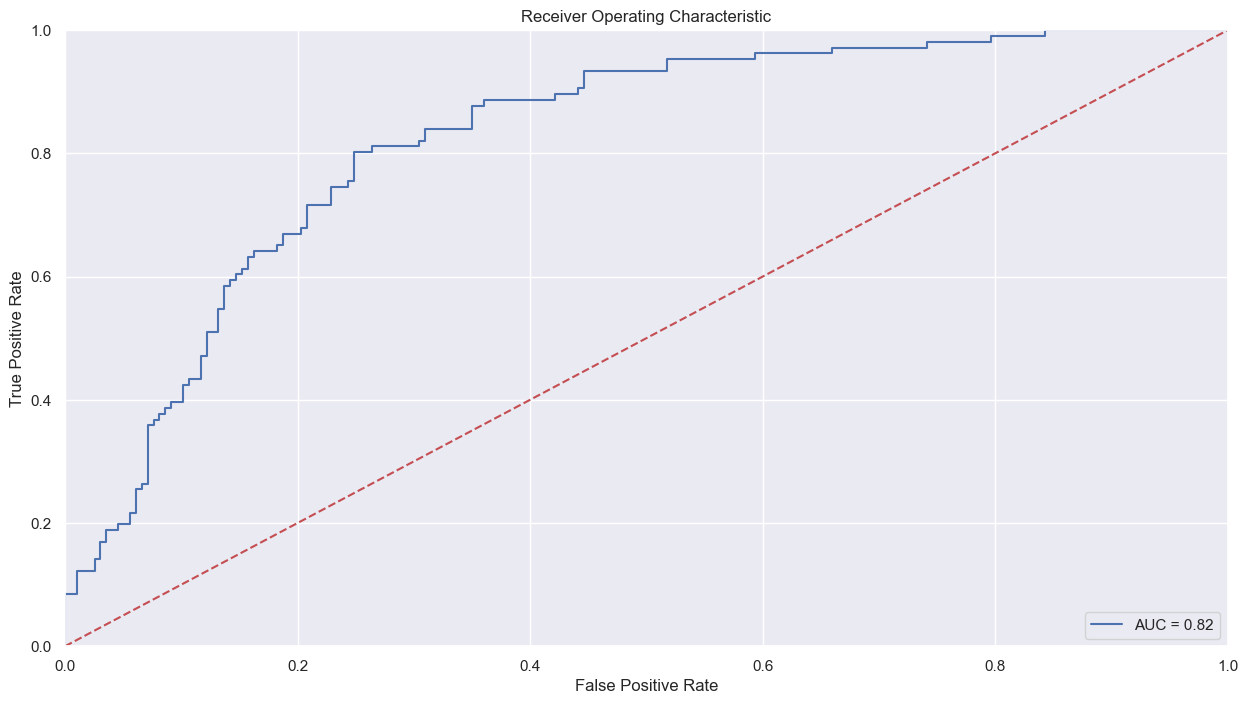

In [52]:
probs = clf.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(15, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
df_students = data[data['StudentStatus'] == 'Yes']
df_ds = data[(data['LearningDataScience'] == "Yes, but data science is a small part of what I'm focused on learning") |
             (data['LearningDataScience'] == "Yes, I'm focused on learning mostly data science skills")]
df_c = data[data['CareerSwitcher'] == 'Yes']
df_e = data[data['EmploymentStatus'] == 'Not employed, but looking for work']
learners = pd.concat((df_students, df_ds, df_c, df_e))
learners = learners[~learners.index.duplicated(keep='first')]
print('{} participants on this survey are learners.'.format(len(learners)))
print(
    'In other words, {:0.2f}% of the participants on this survey are learners.'.format(100 * len(learners) / len(data)))

5494 participants on this survey are learners.
In other words, 32.87% of the participants on this survey are learners.


In [54]:
sexe = learners['GenderSelect'].value_counts()
labels = (np.array(sexe.index))
proportions = (np.array((sexe / sexe.sum()) * 100))
trace = go.Pie(labels=labels, values=proportions,
               hoverinfo='lbal+percent')
layout = go.Layout(
    title='Gender distrubiton of learners'
)
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Career_Switcher")

ValueError: 
    Invalid value of type 'builtins.str' received for the 'hoverinfo' property of pie
        Received value: 'lbal+percent'

    The 'hoverinfo' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['label', 'text', 'value', 'percent', 'name'] joined with '+' characters
        (e.g. 'label+text')
        OR exactly one of ['all', 'none', 'skip'] (e.g. 'skip')
      - A list or array of the above

In [55]:
print("Learners' median age", learners['Age'].median())

Learners' median age 26.0


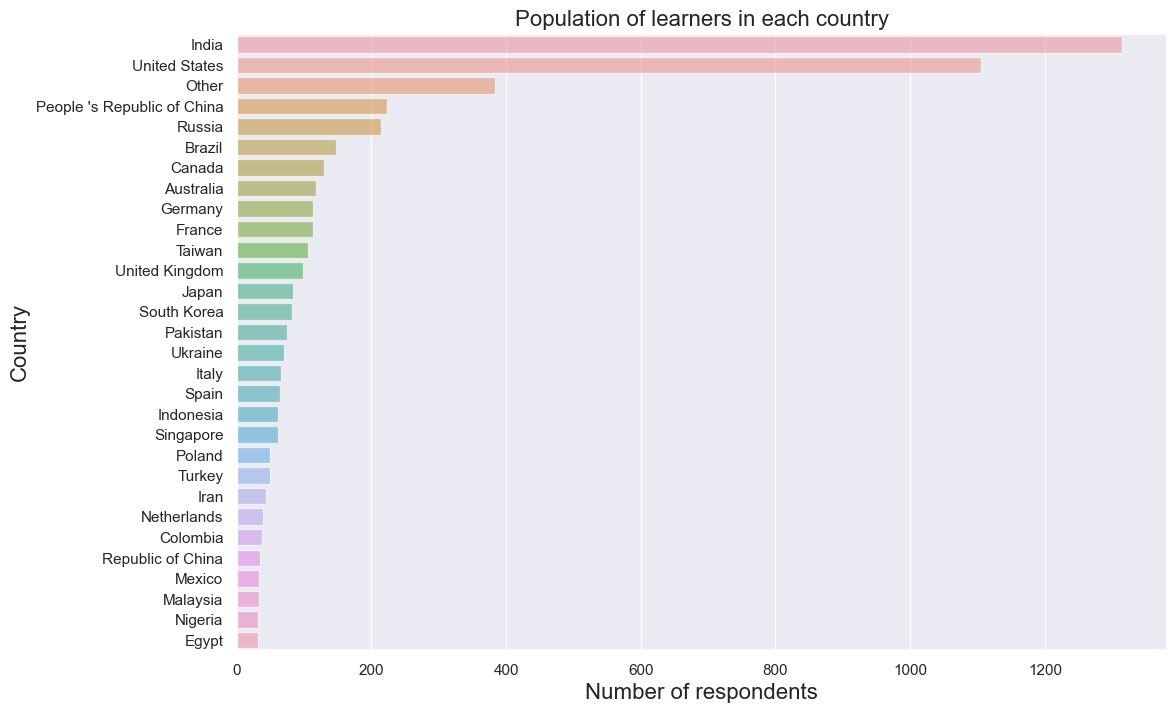

In [56]:
plt.figure(figsize=(12, 8))
countries = learners['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title("Population of learners in each country", fontsize=16)
plt.xlabel("Number of respondents", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show()

In [57]:
d_pcountries = {}
for value in data['Country'].value_counts().index:
    d_pcountries[value] = 100 * len(learners[learners['Country'] == value]) / len(data[data['Country'] == value])
learners_p = pd.DataFrame.from_dict(d_pcountries, orient='index')
learners_p = learners_p.reset_index(drop=False)
learners_p.rename(columns={'index': 'Country', 0: '% of learners'}, inplace=True)

In [58]:
loc_df = pd.read_csv("./location_map.csv")
new_df = pd.merge(learners_p, loc_df, left_on="Country", right_on="COUNTRY")
new_df = new_df[['Country', 'CODE', '% of learners']]
data_t = [dict(
    type='choropleth',
    locations=new_df['CODE'],
    z=new_df['% of learners'],
    text=new_df['Country'],
    colorscale=[[0, "rgb(210, 210, 210)"], [4500, "rgb(220, 220, 220)"]],
    autocolorscale=False,
    reversescale=True,
    marker=dict(
        line=dict(
            color='rgb(180,180,180)',
            width=0.5
        )),
    colorbar=dict(
        autotick=False,
        title='Proportion of learners (in%)'),
)]
layout = dict(
    title='Country wise proportion of learners',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection=dict(
            type='Mercator'
        )
    )
)
fig = dict(data=data_t, layout=layout)
py.iplot(fig, validate=False, filename='d3-world-map')

FileNotFoundError: [Errno 2] No such file or directory: './location_map.csv'

In [59]:
edu = learners['FormalEducation'].value_counts()
labels = (np.array(edu.index))
values = (np.array((edu / edu.sum()) * 100))
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textfont=dict(size=20),
               showlegend=False)
layout = go.Layout(title='Formal Education of learners respondents')
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Formal_Education2")

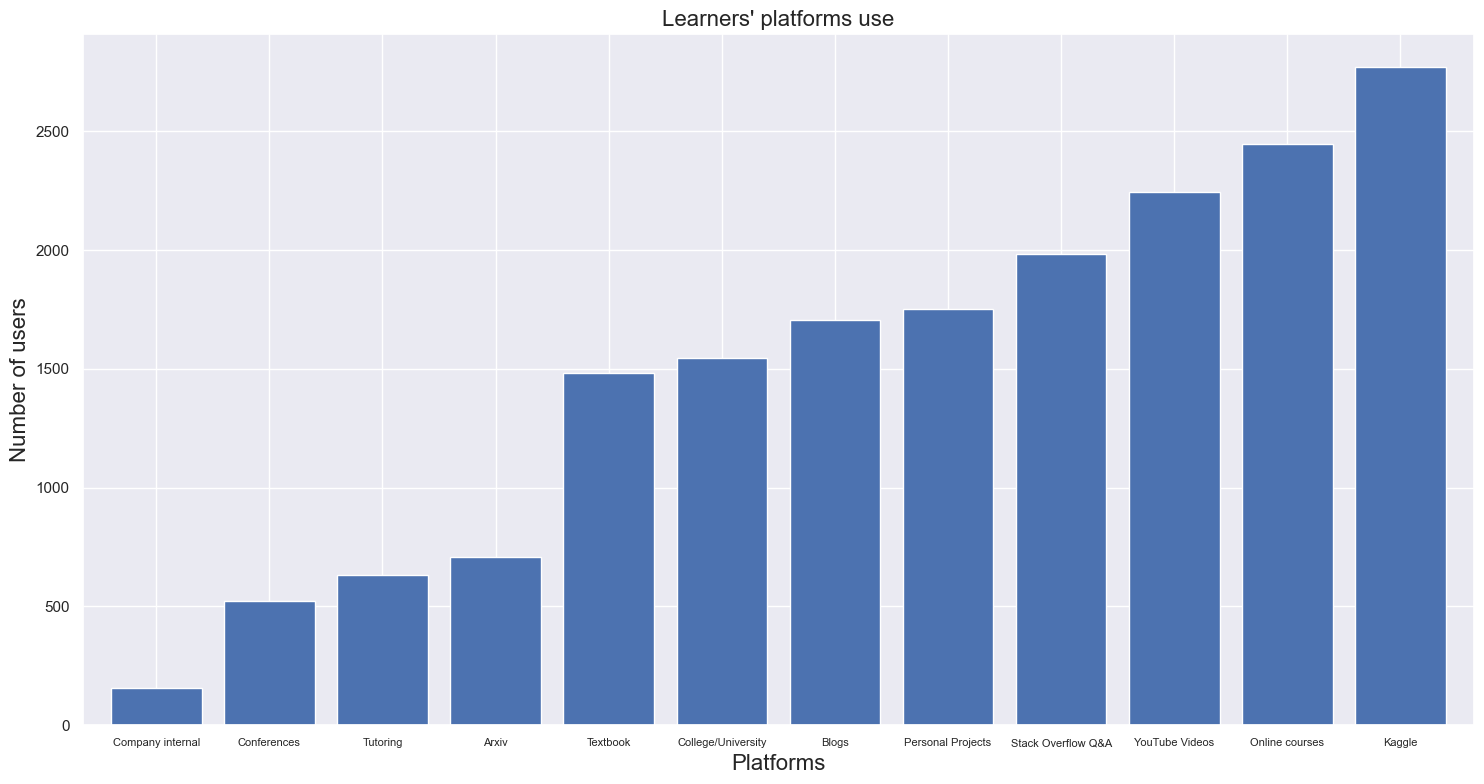

In [60]:
d_plat = {}
platforms = ['College/University', 'Kaggle', 'Online courses', 'Arxiv', 'Company internal', 'Textbook',
             'Personal Projects', 'Stack Overflow Q&A', 'Blogs', 'Tutoring', 'Conferences', 'YouTube Videos']
for platform in platforms:
    d_plat[platform] = 0
    for elem in learners['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem:
            d_plat[platform] += 1
s = pd.DataFrame.from_dict(data=d_plat, orient='index')
s.sort_values(by=list(s), axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar', figsize=(15, 8), width=0.8, align='center')
ax.legend_.remove()
ax.set_title("Learners' platforms use", fontsize=16)
ax.set_xlabel("Platforms", fontsize=16)
ax.set_ylabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(8)
plt.tight_layout()

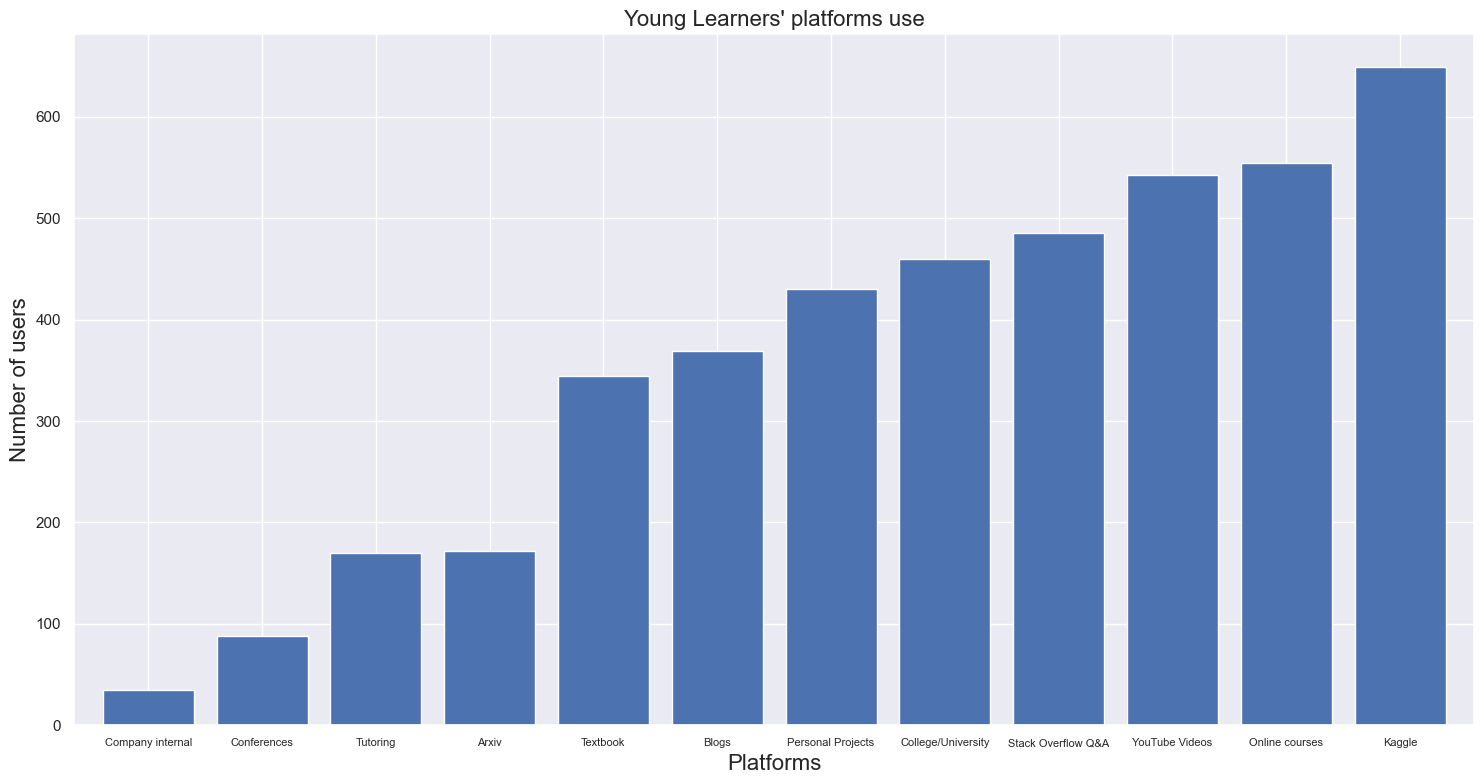

In [61]:
data_young = learners[(learners['Age'] <= 22)]
d_plat2 = {}
for platform in platforms:
    d_plat2[platform] = 0
    for elem in data_young['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem:
            d_plat2[platform] += 1
s = pd.DataFrame.from_dict(data=d_plat2, orient='index')
s.sort_values(by=list(s), axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar', figsize=(15, 8), width=0.8, align='center')
ax.legend_.remove()
ax.set_title("Young Learners' platforms use", fontsize=16)
ax.set_xlabel("Platforms", fontsize=16)
ax.set_ylabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(8)
plt.tight_layout()

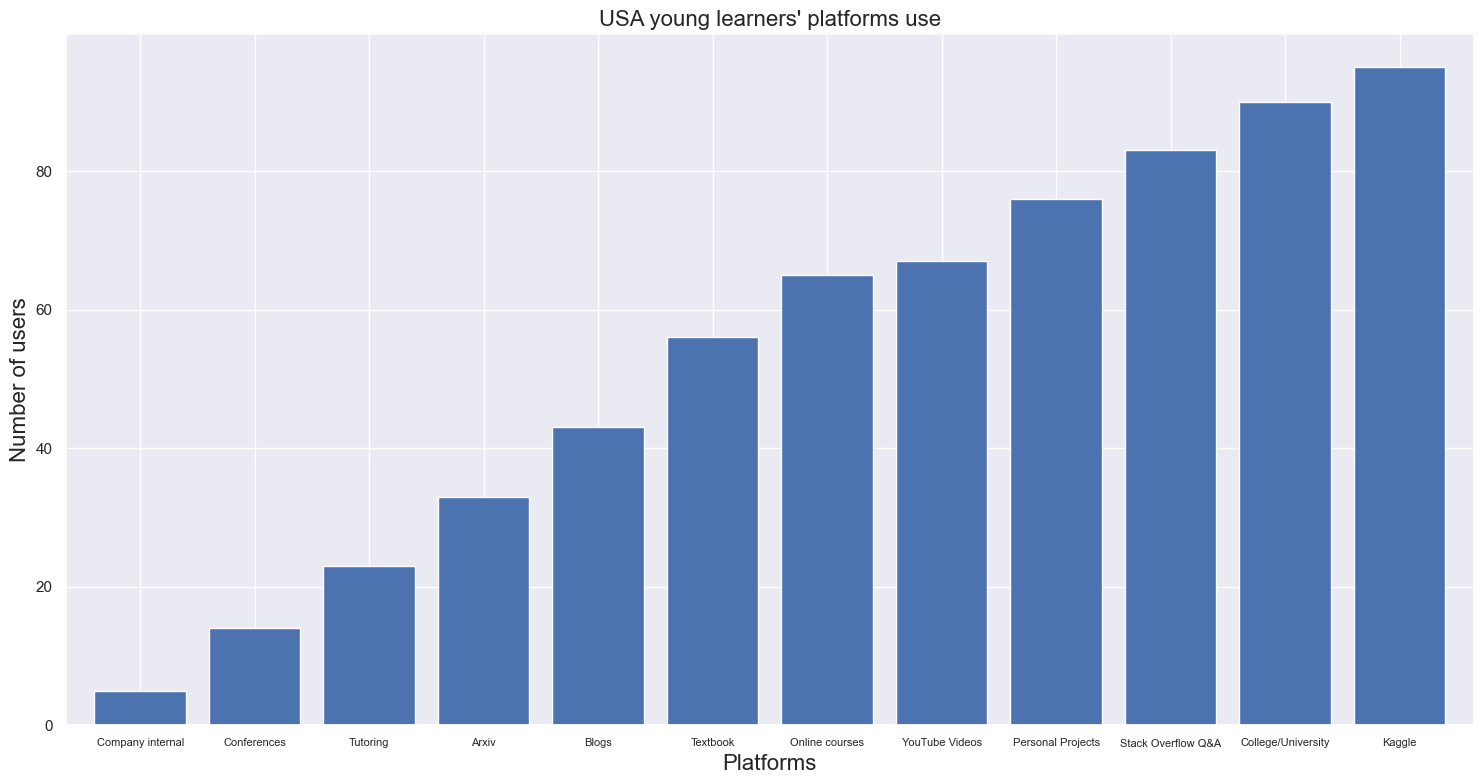

In [62]:
data_young = learners[(learners['Age'] <= 22) & (learners['Country'] == 'United States')]
d_plat2 = {}
for platform in platforms:
    d_plat2[platform] = 0
    for elem in data_young['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem:
            d_plat2[platform] += 1
s = pd.DataFrame.from_dict(data=d_plat2, orient='index')
s.sort_values(by=list(s), axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar', figsize=(15, 8), width=0.8, align='center')
ax.legend_.remove()
ax.set_title("USA young learners' platforms use", fontsize=16)
ax.set_xlabel("Platforms", fontsize=16)
ax.set_ylabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(8)
plt.tight_layout()

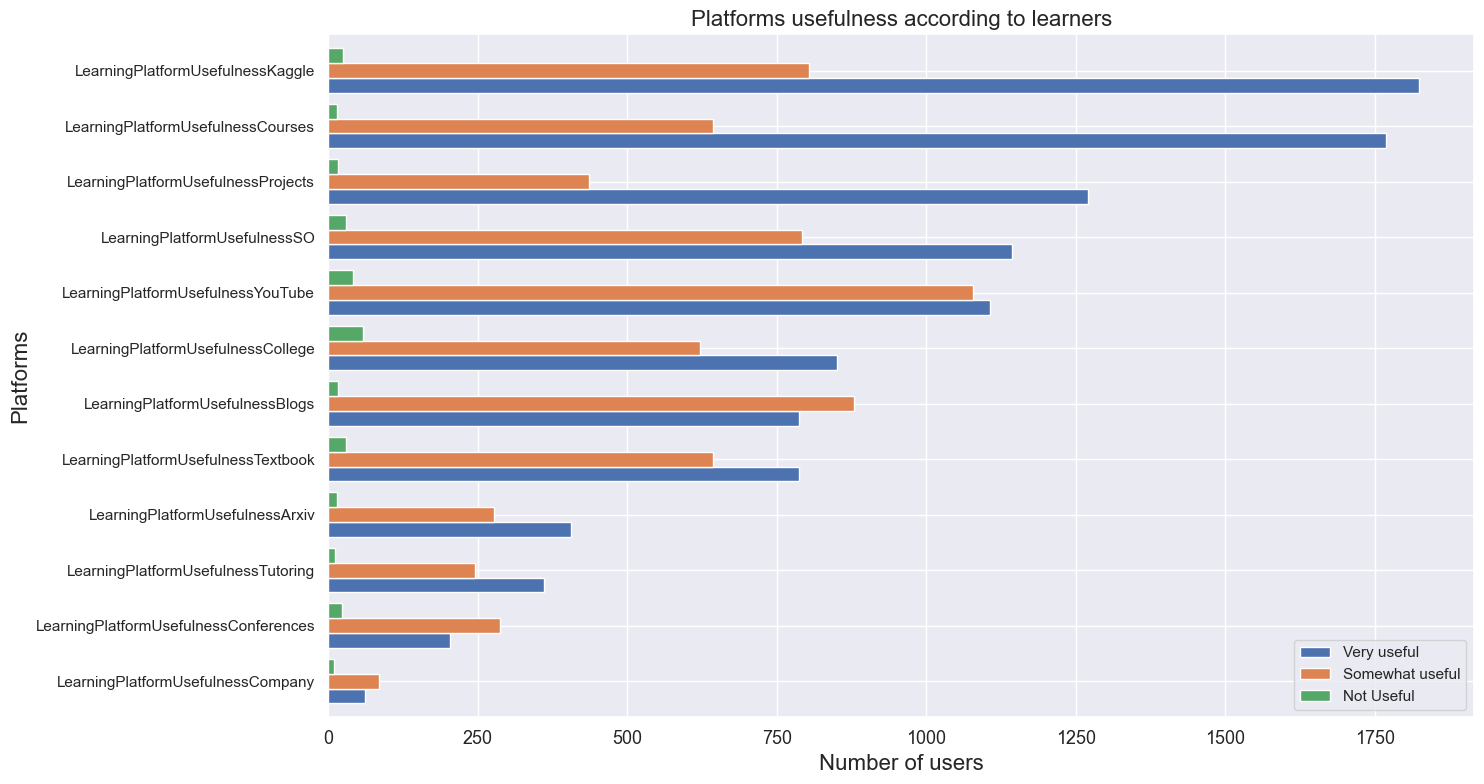

In [63]:
d_useful = {}
plat_use = ['LearningPlatformUsefulnessArxiv', 'LearningPlatformUsefulnessBlogs', 'LearningPlatformUsefulnessCollege',
            'LearningPlatformUsefulnessCompany', 'LearningPlatformUsefulnessConferences',
            'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses',
            'LearningPlatformUsefulnessProjects',
            'LearningPlatformUsefulnessSO', 'LearningPlatformUsefulnessTextbook', 'LearningPlatformUsefulnessTutoring',
            'LearningPlatformUsefulnessYouTube']
for plat in plat_use:
    L = learners[plat].value_counts()
    d_useful[plat] = {'Very useful': L.loc['Very useful'],
                      'Somewhat useful': L.loc['Somewhat useful'],
                      'Not Useful': L.loc['Not Useful']}
s = pd.DataFrame.from_dict(data=d_useful, orient='index')
s.sort_values(by=list(s), axis=0, ascending=True, inplace=True)
ax = s.plot(kind='barh', figsize=(15, 8), width=0.8, align='center')
ax.set_title("Platforms usefulness according to learners", fontsize=16)
ax.set_ylabel("Platforms", fontsize=16)
ax.set_xlabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(13)
plt.tight_layout()

In [64]:
d_online = {}
online_plat = ['Coursera', 'Udacity', 'edX',
               'DataCamp', 'Other']
for plat in online_plat:
    d_online[plat] = 0
    for elem in learners['CoursePlatformSelect'].fillna('Missing'):
        if plat in elem:
            d_online[plat] += 1
online = pd.DataFrame.from_dict(d_online, orient='index')
labels = (np.array(online.index))
proportions = np.array((online[0] / online[0].sum()) * 100)
trace = go.Pie(labels=labels, values=proportions,
               hoverinfo='lbal+percent')
layout = go.Layout(title='Online Platforms popularity')
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Online_plat")

ValueError: 
    Invalid value of type 'builtins.str' received for the 'hoverinfo' property of pie
        Received value: 'lbal+percent'

    The 'hoverinfo' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['label', 'text', 'value', 'percent', 'name'] joined with '+' characters
        (e.g. 'label+text')
        OR exactly one of ['all', 'none', 'skip'] (e.g. 'skip')
      - A list or array of the above

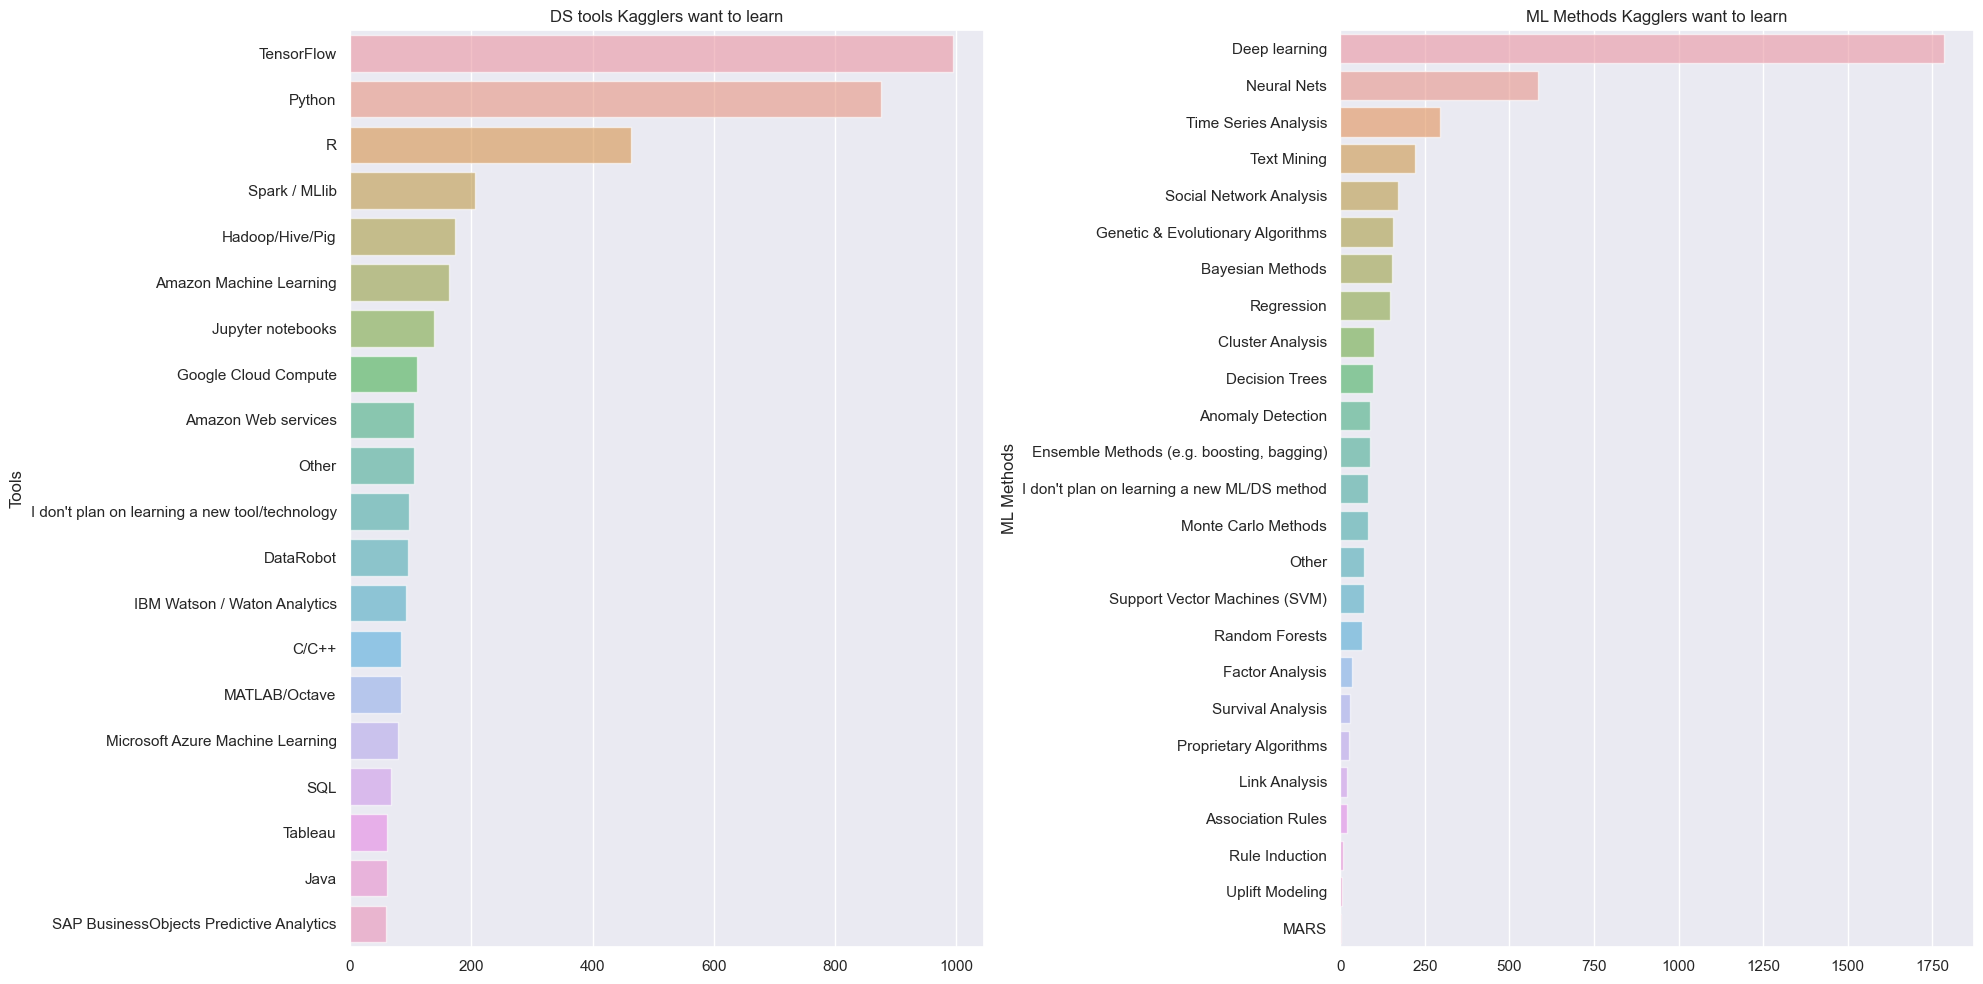

In [65]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
tools = learners['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=tools.index, x=tools.values, alpha=0.6, ax=ax[0])
ax[0].set_title('DS tools Kagglers want to learn')
ax[0].set_xlabel('')
ax[0].set_ylabel('Tools')
methods = learners['MLMethodNextYearSelect'].value_counts()
sns.barplot(y=methods.index, x=methods.values, alpha=0.6, ax=ax[1])
ax[1].set_title('ML Methods Kagglers want to learn')
ax[1].set_xlabel('')
ax[1].set_ylabel('ML Methods')
plt.tight_layout()
plt.show()

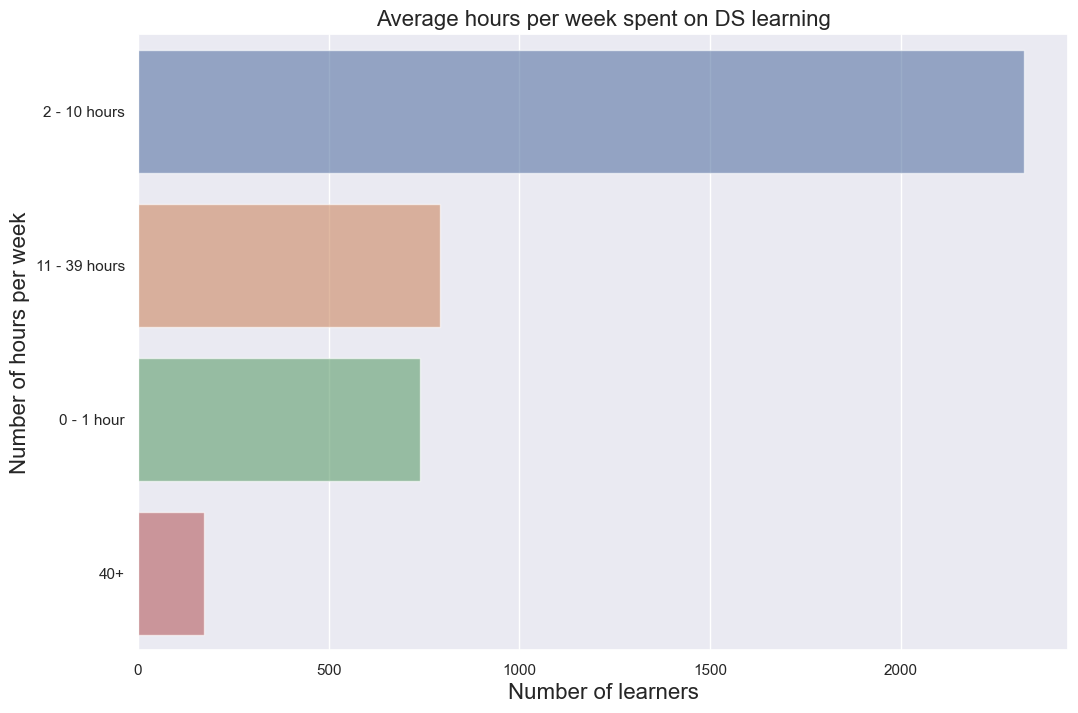

In [66]:
plt.figure(figsize=(12, 8))
time = data['TimeSpentStudying'].value_counts()
sns.barplot(y=time.index, x=time.values, alpha=0.6)
plt.title("Average hours per week spent on DS learning", fontsize=16)
plt.xlabel("Number of learners", fontsize=16)
plt.ylabel("Number of hours per week", fontsize=16)
plt.show()

In [67]:
start = data['LearningDataScienceTime'].value_counts()
labels = (np.array(start.index))
values = (np.array((start / edu.sum()) * 100))
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textfont=dict(size=20))
layout = go.Layout(title='Years invested in Data Science Learning')
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="nb_yers")

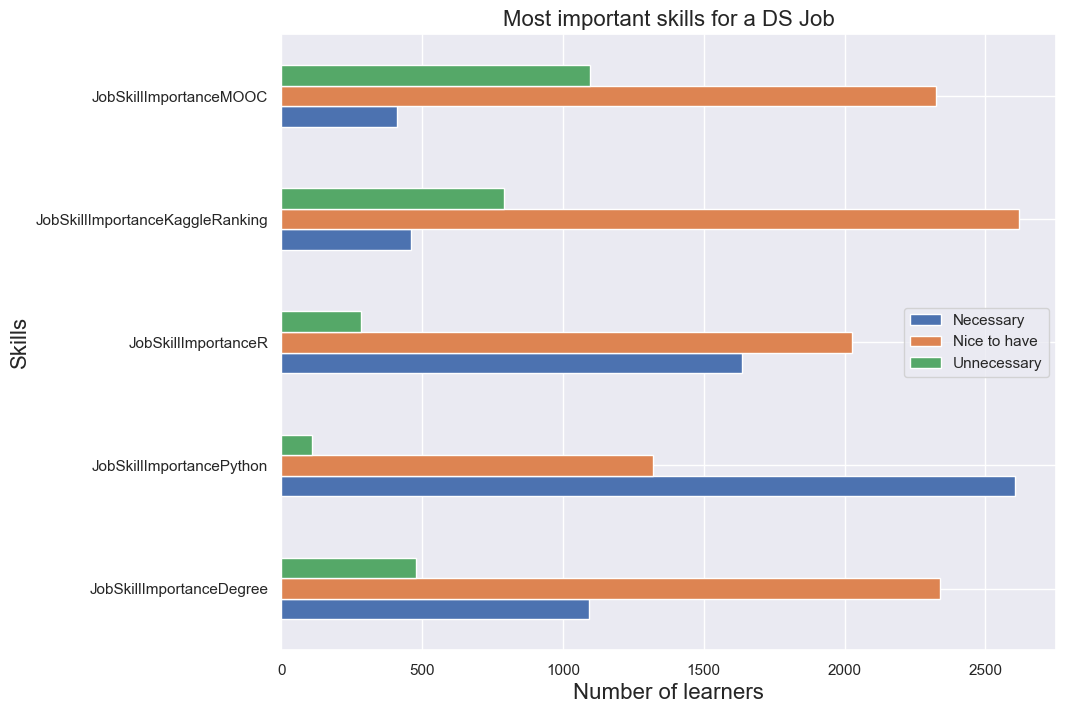

In [68]:
df2 = data
d_jobskills = {}
job_skills = ['JobSkillImportanceDegree', 'JobSkillImportancePython', 'JobSkillImportanceR',
              'JobSkillImportanceKaggleRanking', 'JobSkillImportanceMOOC']
for skill in job_skills:
    L = df2[skill].value_counts()
    d_jobskills[skill] = {'Necessary': L.loc['Necessary'],
                          'Nice to have': L.loc['Nice to have'],
                          'Unnecessary': L.loc['Unnecessary']}
(pd.DataFrame(d_jobskills)).transpose().plot(kind='barh', figsize=(10, 8))
plt.title("Most important skills for a DS Job", fontsize=16)
plt.xlabel("Number of learners", fontsize=16)
plt.ylabel("Skills", fontsize=16)
plt.show()

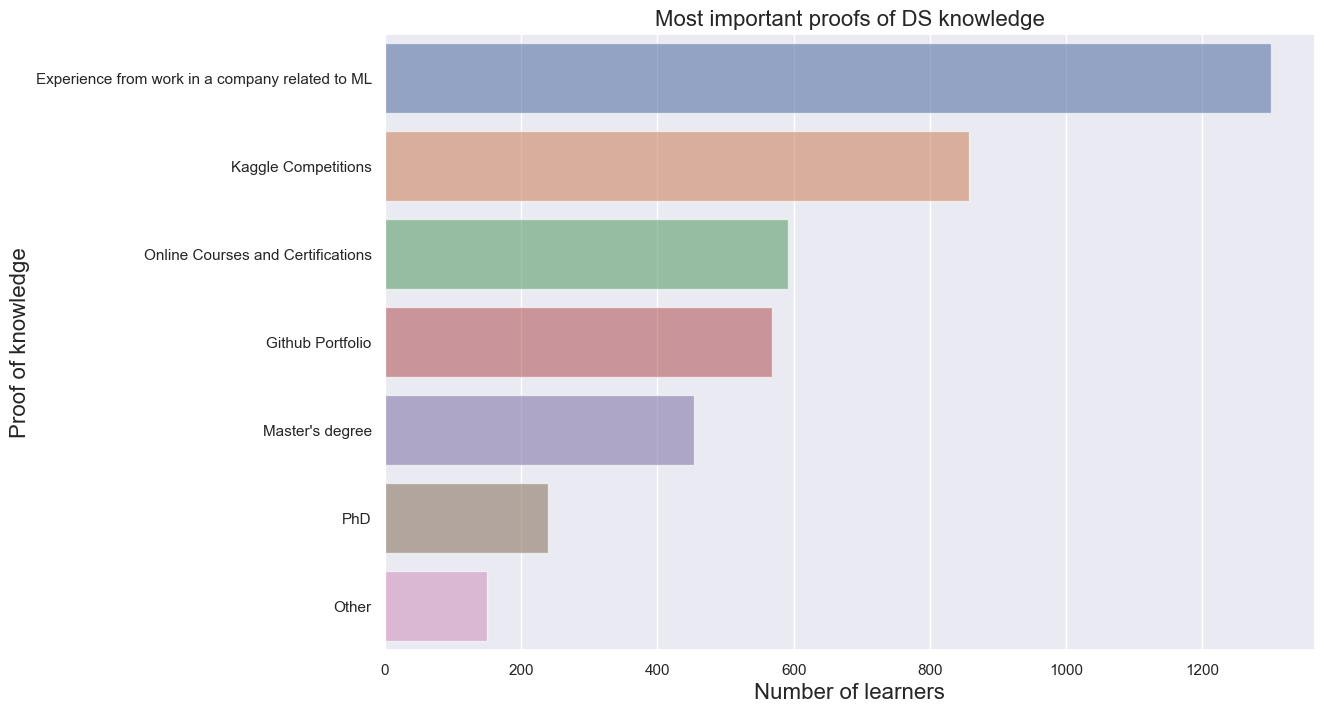

In [69]:
plt.figure(figsize=(12, 8))
proof = learners['ProveKnowledgeSelect'].value_counts()
sns.barplot(y=proof.index, x=proof.values, alpha=0.6)
plt.title("Most important proofs of DS knowledge", fontsize=16)
plt.xlabel("Number of learners", fontsize=16)
plt.ylabel("Proof of knowledge", fontsize=16)
plt.show()

In [70]:
job_s = learners['JobSearchResource'].value_counts()
labels = (np.array(job_s.index))
values = (np.array((job_s / job_s.sum()) * 100))
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textfont=dict(size=20),
               showlegend=False)
layout = go.Layout(title='Most used resources for finding a DS job')
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Job_resource")

In [71]:
job_s = learners['JobHuntTime'].value_counts()
labels = (np.array(job_s.index))
values = (np.array((job_s / job_s.sum()) * 100))
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textfont=dict(size=20),
               showlegend=True)
layout = go.Layout(title='Hours per week spent  looking for a data science job?')
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Job_resource")

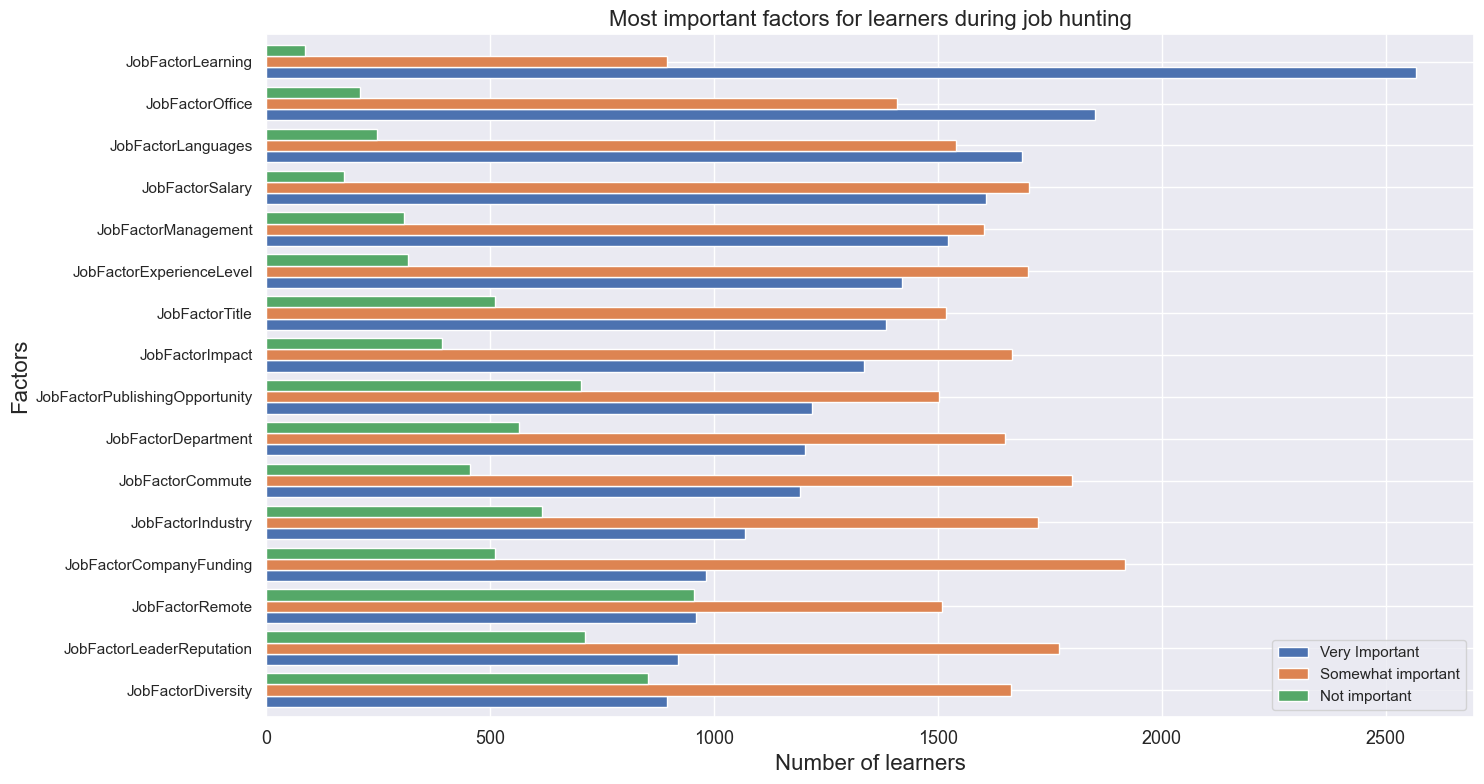

In [72]:
d_criterias = {}
criterias_job = ['JobFactorLearning', 'JobFactorSalary', 'JobFactorOffice', 'JobFactorLanguages',
                 'JobFactorCommute', 'JobFactorManagement', 'JobFactorExperienceLevel',
                 'JobFactorDepartment', 'JobFactorTitle', 'JobFactorCompanyFunding', 'JobFactorImpact',
                 'JobFactorRemote', 'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
                 'JobFactorPublishingOpportunity']
for criteria in criterias_job:
    L = df2[criteria].value_counts()
    d_criterias[criteria] = {'Very Important': L.loc['Very Important'],
                             'Somewhat important': L.loc['Somewhat important'],
                             'Not important': L.loc['Not important']}
s = pd.DataFrame.from_dict(data=d_criterias, orient='index')
s.sort_values(by=list(s), axis=0, ascending=True, inplace=True)
ax = s.plot(kind='barh', figsize=(15, 8), width=0.8, align='center')
ax.set_title("Most important factors for learners during job hunting", fontsize=16)
ax.set_ylabel("Factors", fontsize=16)
ax.set_xlabel("Number of learners", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(13)
plt.tight_layout()